In [0]:
#pip install -U imbalanced-learn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score,roc_auc_score,roc_curve, auc, f1_score,classification_report 


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import naive_bayes 

from sklearn.ensemble import VotingClassifier

#import for neural network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

In [0]:
data=pd.read_csv("Data.csv")

In [0]:
data.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [0]:
print(data.shape)
data.columns

(3333, 20)


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [0]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [0]:
data.head(10)

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False
5    AL             118  ...                       0  False
6    MA             121  ...                       3  False
7    MO             147  ...                       0  False
8    WV             141  ...                       0  False
9    RI              74  ...                       0  False

[10 rows x 20 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [0]:
data.describe()

Account length    Area code  ...  Total intl charge  Customer service calls
count     3333.000000  3333.000000  ...        3333.000000             3333.000000
mean       101.064806   437.182418  ...           2.764581                1.562856
std         39.822106    42.371290  ...           0.753773                1.315491
min          1.000000   408.000000  ...           0.000000                0.000000
25%         74.000000   408.000000  ...           2.300000                1.000000
50%        101.000000   415.000000  ...           2.780000                1.000000
75%        127.000000   510.000000  ...           3.270000                2.000000
max        243.000000   510.000000  ...           5.400000                9.000000

[8 rows x 16 columns]

In [0]:
data.isnull().mean()

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

# Statistical Analysis

### Cardinality

In [0]:
data.apply(lambda x: x.nunique())

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

Area code,international plan,Voice mail plan,Total intl calls,Customer service calls
has low cardinality While Other Variable has high cardinality

In [0]:
for col in data.columns[:5]:
    print(col,"\n",data[col].unique())

State 
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
Account length 
 [128 107 137  84  75 118 121 147 141  74 168  95  62  85  93  76  73  77
 130 132 174  57  54  20 142 172  12  72  78 136 149  98 135  34 160  64
  59  97  52  60  96  87  81 125 116  38  40  43 113 126 150 138 162  90
  50  82 144  70  55 106  94 111  80 104  99 120 122 157 103  36 112  46
  41 193  61  92 131 163  91 127 110 117 140  83 145  56 151 139 115 146
 185 148  68 179  67  19 170 164  51  63  53 105  66  86  35  88 123 100
 108  22  33 114  24 119 101  49  48  71 167 166 158 196 209  16  39 173
 129 143  89  44  79  31  37 159 194 154  45  32  21 133  25 224  58 155
  11 109 165  18 161 124  30 176  47 190 152  65 186 171 102  28 153 169
  13  42 189  69  27 134 156 243  23 205 200   5   9 178 1

In [0]:
for col in data.columns[5:10]:
    print(col,"\n",data[col].unique())

Number vmail messages 
 [25 26  0 24 37 27 33 39 41 28 30 34 46 35 21 42 36 22 23 43 31 38 40 29
 18 32 17 45 16 14 20 19 15 12 47  8 44  4 10 13 50  9 48 51 11 49]
Total day minutes 
 [265.1 161.6 243.4 ... 295.  238.4 280. ]
Total day calls 
 [110 123 114  71 113  98  88  79  84 127  96  70 139  66  90 117  89 112
  86  76 115  73 109  95 105 121 118  94  80  64 106 102  85  82  77  67
  97 133 135 108  57  83 129 103  92  74  93 101 146  99 104 125  61 100
  87 131  65 124 119  52  68 107  47 116 120 151 126  91 122 111 145  78
 136 140  81 128  69 158 134 130  63  53  75 141  59 132 138 137  54  58
  62  36  72  40 150 147  56  51  55 148  48  60  42   0  45 160 149 144
 143 152 142 156  49 157  44 163 165  30  35]
Total day charge 
 [45.07 27.47 41.38 ... 50.15 40.53 47.6 ]
Total eve minutes 
 [197.4 195.5 121.2 ...  74.6  87.8  85. ]


In [0]:
for col in data.columns[10:15]:
    print(col,"\n",data[col].unique())

Total eve calls 
 [ 99 103 110  88 122 101 108  94 111 148  71  75  76  90  65  93 121  72
 112 100  84  63 107 115 119 102 116  92  85  98 118  74  58  96  67  62
  77 126 142  64  97 104  80  83 117  79  95 105  81 113 109  48  82  86
  87 123 114 140 128 106  60 125  46 138 129  89 133 136  57 135 139  51
  70  78 151  91 152 120  66 127 132 137  73 143  68  61  42  54 149 124
 134 131  69 130  52  49  59 146 147  55  12  50 157  56  45 144  36 156
  53 141  44 153 154 155 150  43   0 145 159 170 164 168  37]
Total eve charge 
 [16.78 16.62 10.3  ...  6.34  7.46  7.23]
Total night minutes 
 [244.7 254.4 162.6 ... 175.2 207.6 156.8]
Total night calls 
 [ 91 103 104  89 121 118  96  97  94 128 115  99  75 108  74 133  64  78
  68 102 148  98  90 116  71 107 135  92  86 127  79  87 129  77  95  54
 106  53  67 139  60 100  61 109 105 111  73  76 119  88  84  57  62 137
 113 114 126 122 123 117  82 120  80 130 134  59 112 132 142 101  69 131
 110  83  93 124 136  81  66 143  55  56  70 

In [0]:
for col in data.columns[15:20]:
    print(col,"\n",data[col].unique())

Total intl minutes 
 [10.  13.7 12.2  6.6 10.1  6.3  7.5  7.1 11.2  9.1 12.3 13.1 13.8  8.1
 13.  10.6  5.7  9.5 10.3 15.5 14.7 14.2 12.6 11.8  8.3 10.5 11.1  9.4
 14.6  9.2  3.5  8.5  7.4 11.   7.8  6.8  9.3  9.7 10.2  8.   5.8 12.
 11.4 11.6  8.2  6.2 12.1  7.3  6.1 11.7 15.  13.2  9.8 12.4 10.9 13.9
  7.9  8.7  5.3  4.4 11.3  9.6 13.3 20.   7.2  6.4 14.1 14.3  6.9 11.5
 15.8 12.8 16.2  0.  11.9  9.9  8.4 10.8  9.   8.9  8.8 13.4 10.7 17.6
  4.7  7.7 13.5 12.9 14.4 14.5  6.7 15.4  5.9 18.9  7.6  5.  12.5  8.6
  7.  14.  12.7 18.  16.  14.8  3.7  4.8 15.3  6.  13.6 17.2 17.5  5.4
 18.2  3.6 16.5  4.6  5.1  4.1  6.5 15.6 10.4 16.4 16.7  1.3 15.2 15.1
 15.9  5.5 16.1 14.9  4.  16.9  5.2  4.2 17.   3.9  2.2  5.6 15.7  4.5
 17.9 16.3  4.9 17.3  3.8 18.4 17.8  4.3  2.9  3.1  3.3  2.6  3.4  1.1
 16.6  2.1  2.4  2.5  2.7  2.  17.1 18.3]
Total intl calls 
 [ 3  5  7  6  2  4 19 10  9 15  8  1 11  0 12 13 18 14 16 20 17]
Total intl charge 
 [2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 3.02 2.46 3.

In [0]:
categorical=["State","Area code","International plan","Voice mail plan","Churn","Customer service calls"]
numerical = ["Account length","Number vmail messages","Total day minutes","Total day calls",
            "Total day charge","Total eve minutes","Total eve calls",
            "Total eve charge","Total night minutes","Total night calls",
             "Total night charge","Total intl minutes","Total intl calls",
             "Total intl charge"]

In [0]:
len(categorical)

6

In [0]:
len(numerical)

14

In [0]:
for cat in categorical:
    print(cat,'\n',data[cat].value_counts(),'\n')

State 
 WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64 

Area code 
 415    1655
510     840
408     838
Name: Area code, dtype: int64 

International plan 
 No     3010
Yes     323
Name: International plan, dtype: int64 

Voice mail plan 
 No     2411
Yes     922
Name: Voice mail plan, dtype: int64 

Churn 
 False    2850
True      483
Name: Churn, dtype: int64 

Customer service calls 
 1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer serv

In [0]:
data["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

# Univarite Analysis

In [0]:
df_True=data.loc[data["Churn"]==True]
df_False=data.loc[data["Churn"]==False]

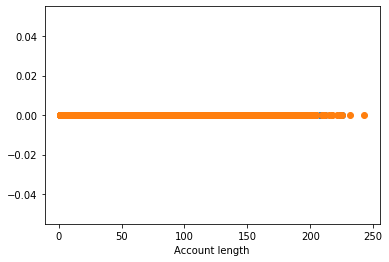

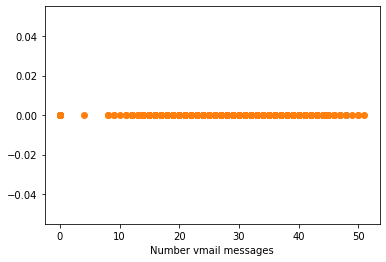

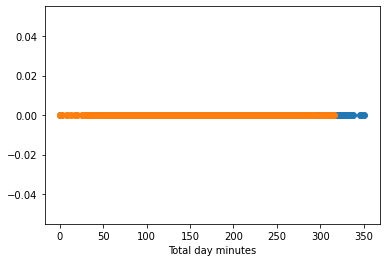

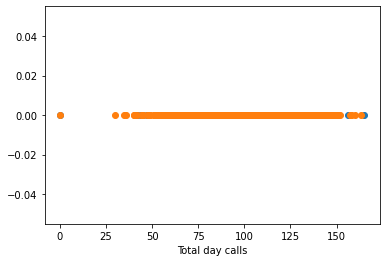

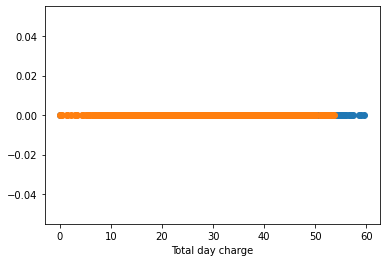

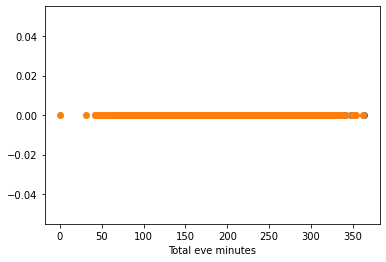

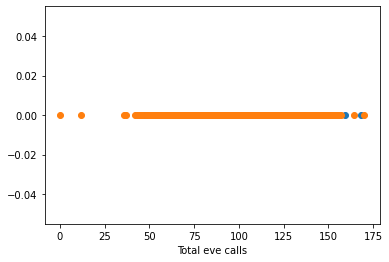

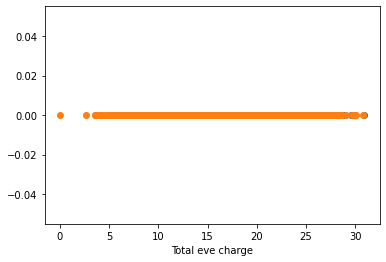

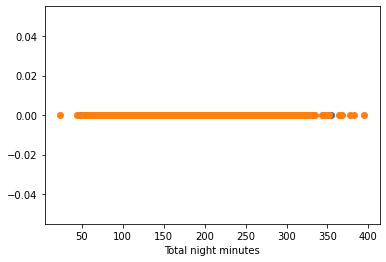

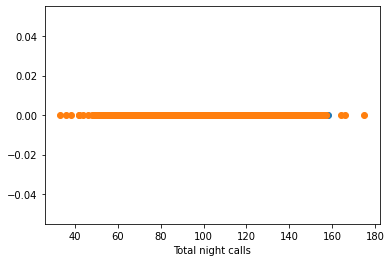

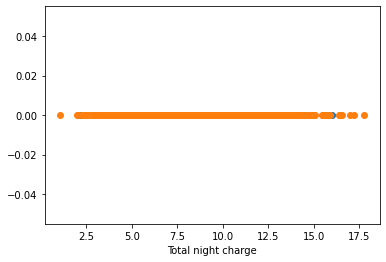

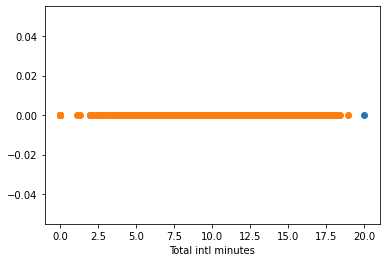

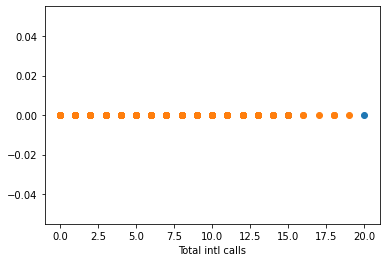

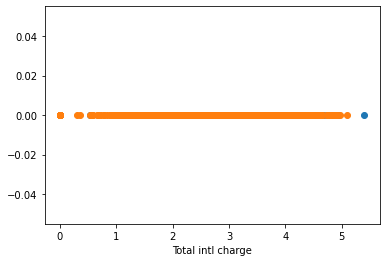

In [0]:
for num in numerical:
    plt.plot(df_True[num],np.zeros_like(df_True[num]),'o')
    plt.plot(df_False[num],np.zeros_like(df_False[num]),'o')
    plt.xlabel(num)
    plt.show()

## Analysis of Categorical Features

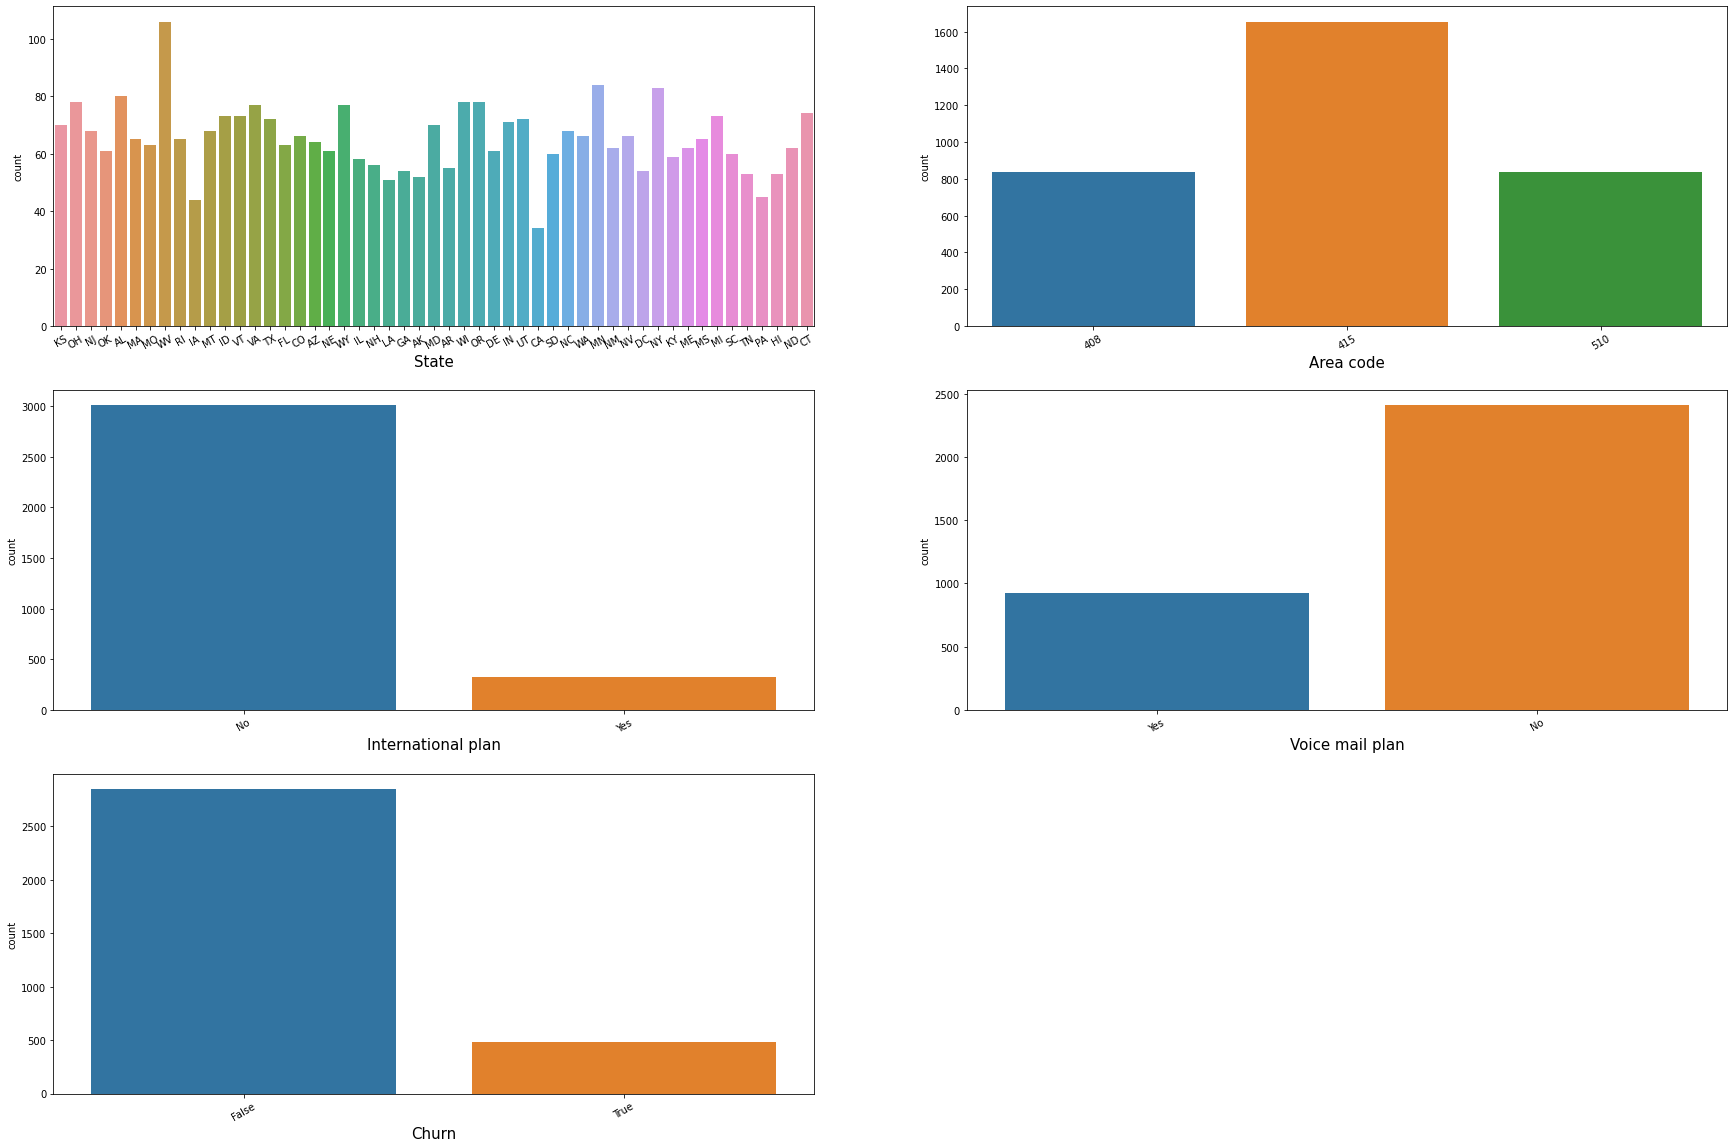

In [0]:
fig = plt.figure(figsize = (30,20))
axes = 320
for cat in categorical[0:5]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =data, x = cat)
    plt.xlabel(cat,fontsize=15)
    plt.xticks(rotation=30)
plt.show()

1) Area Code 415 is greater then other 2 area

2) Mostly Customer has not Subcribe to international plan and Voice Mail Plan Service

3) The Number of churner are low as compared to Non Churner

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

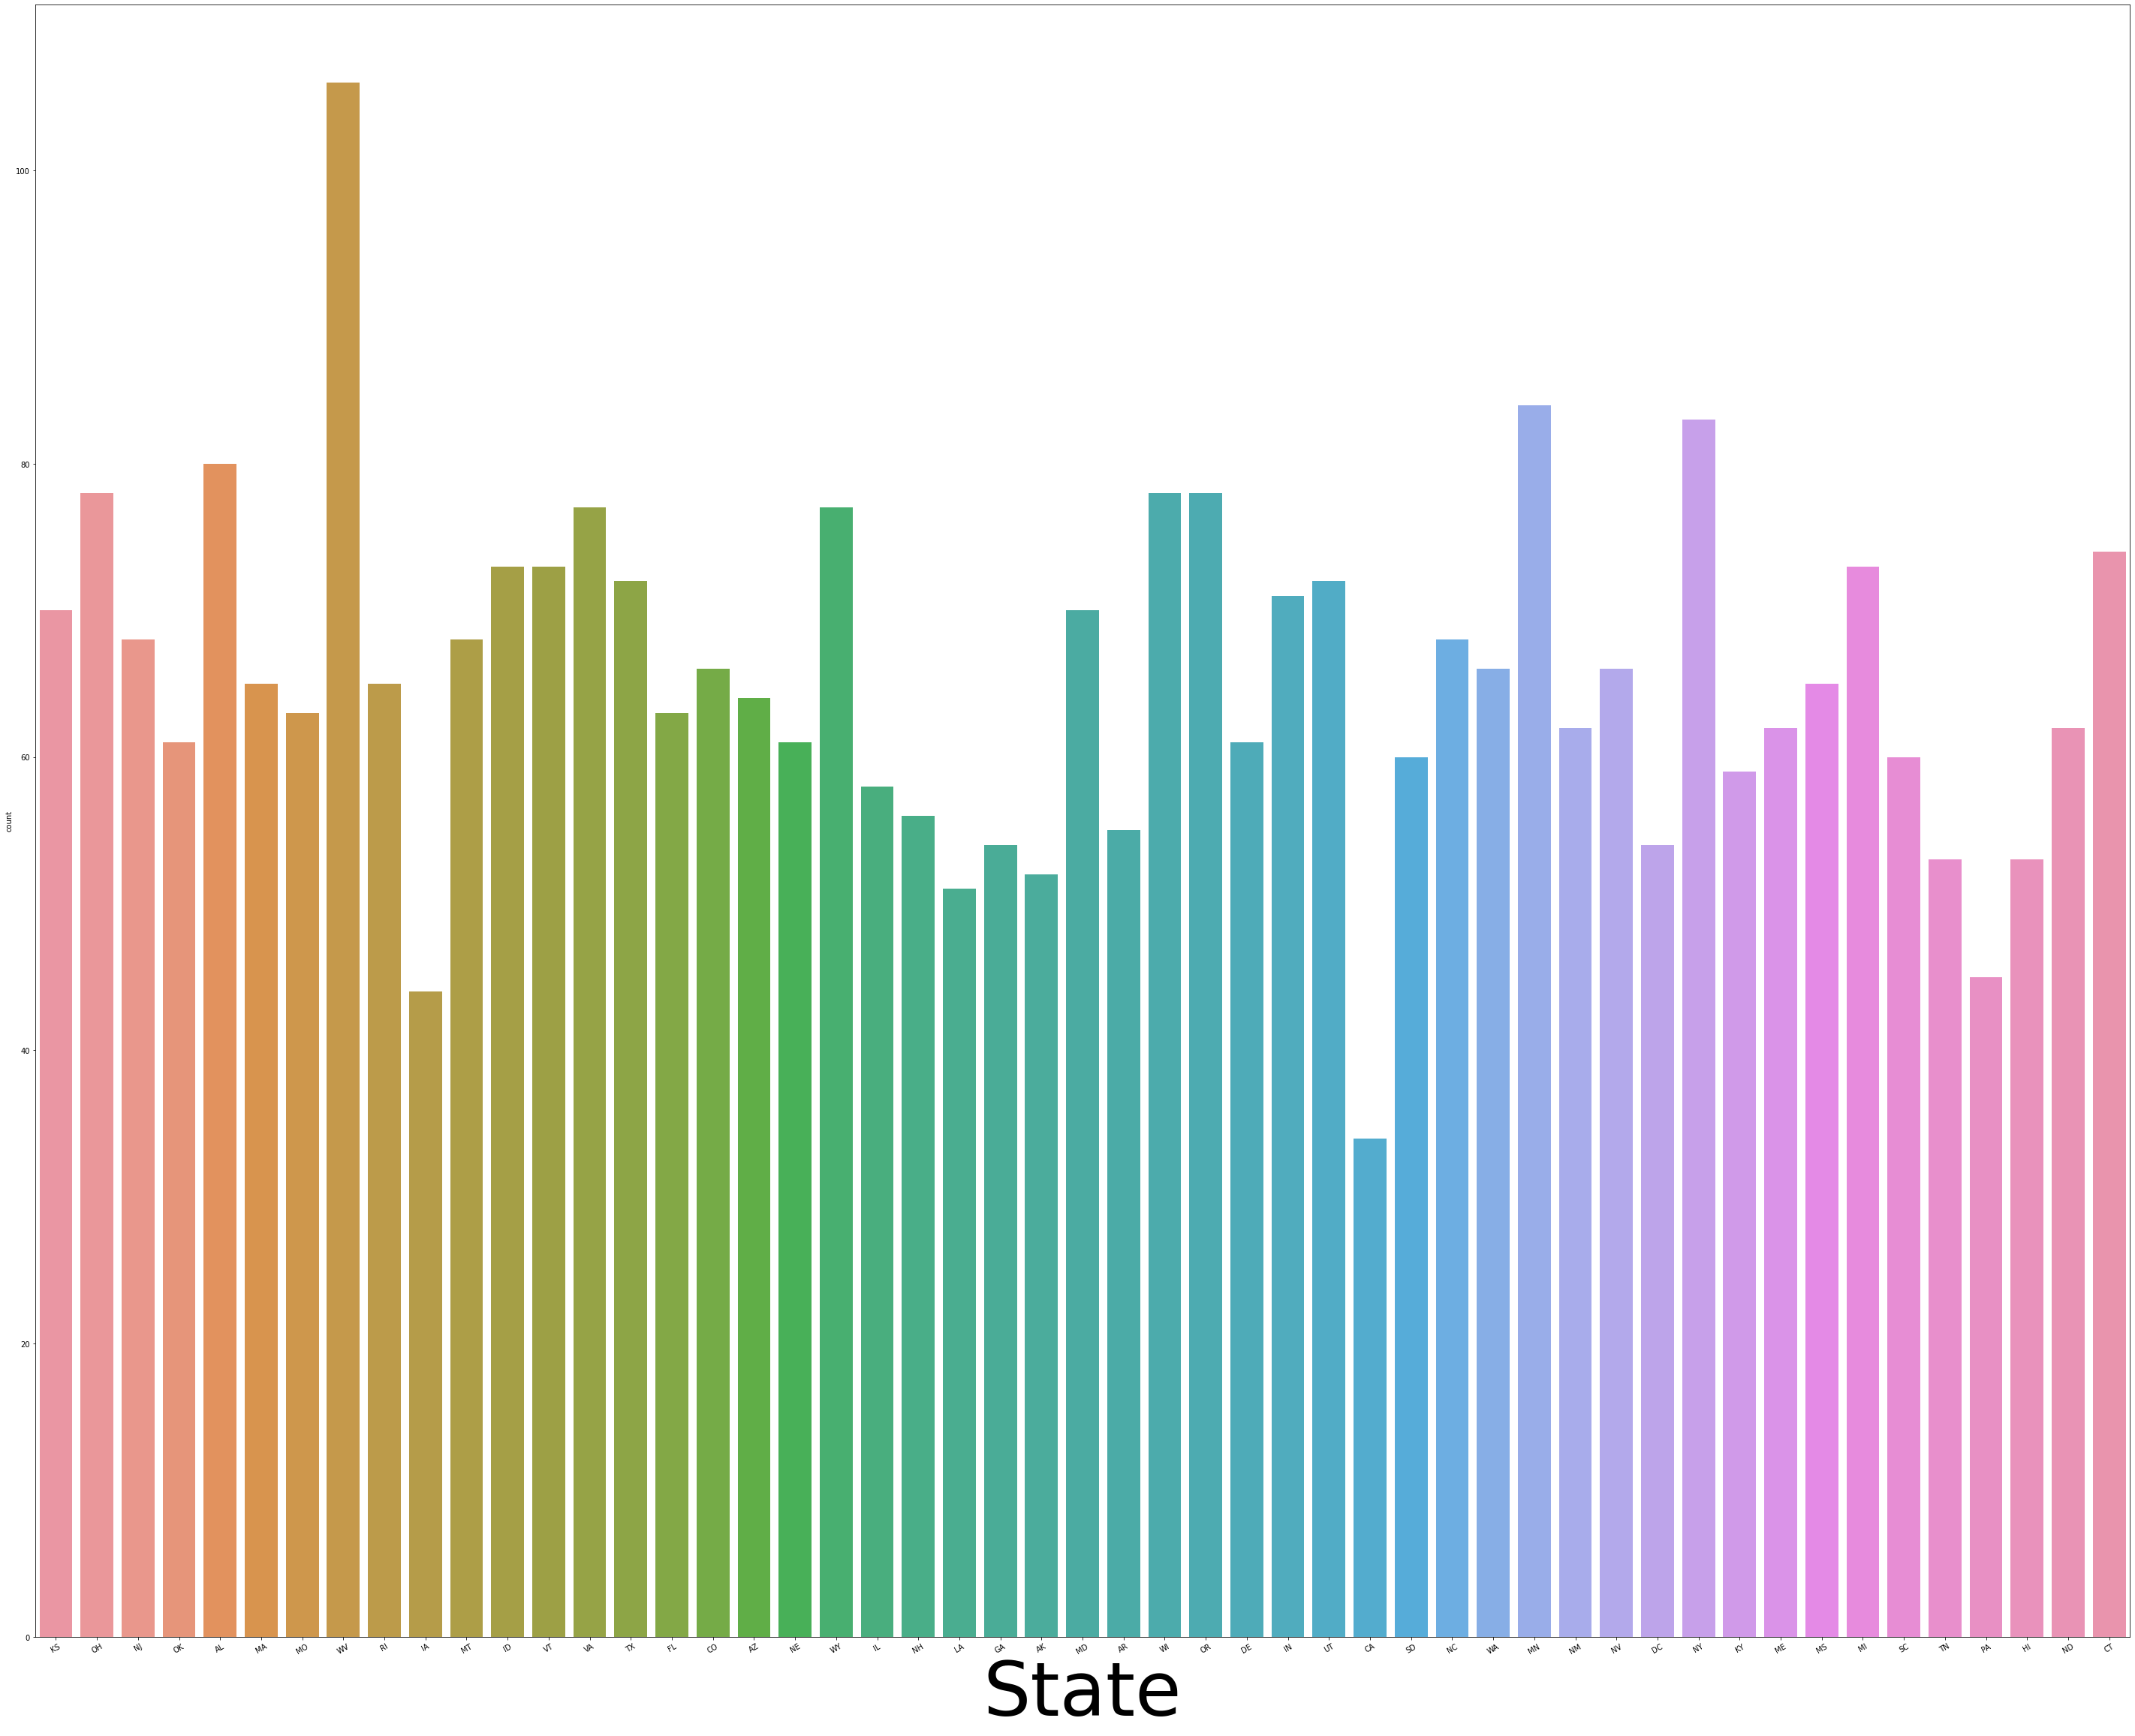

In [0]:
state1=[]
plt.figure(figsize = (50,40))
sns.countplot(data =data, x = "State")
plt.xlabel("State",fontsize=100)
plt.xticks(rotation=30)


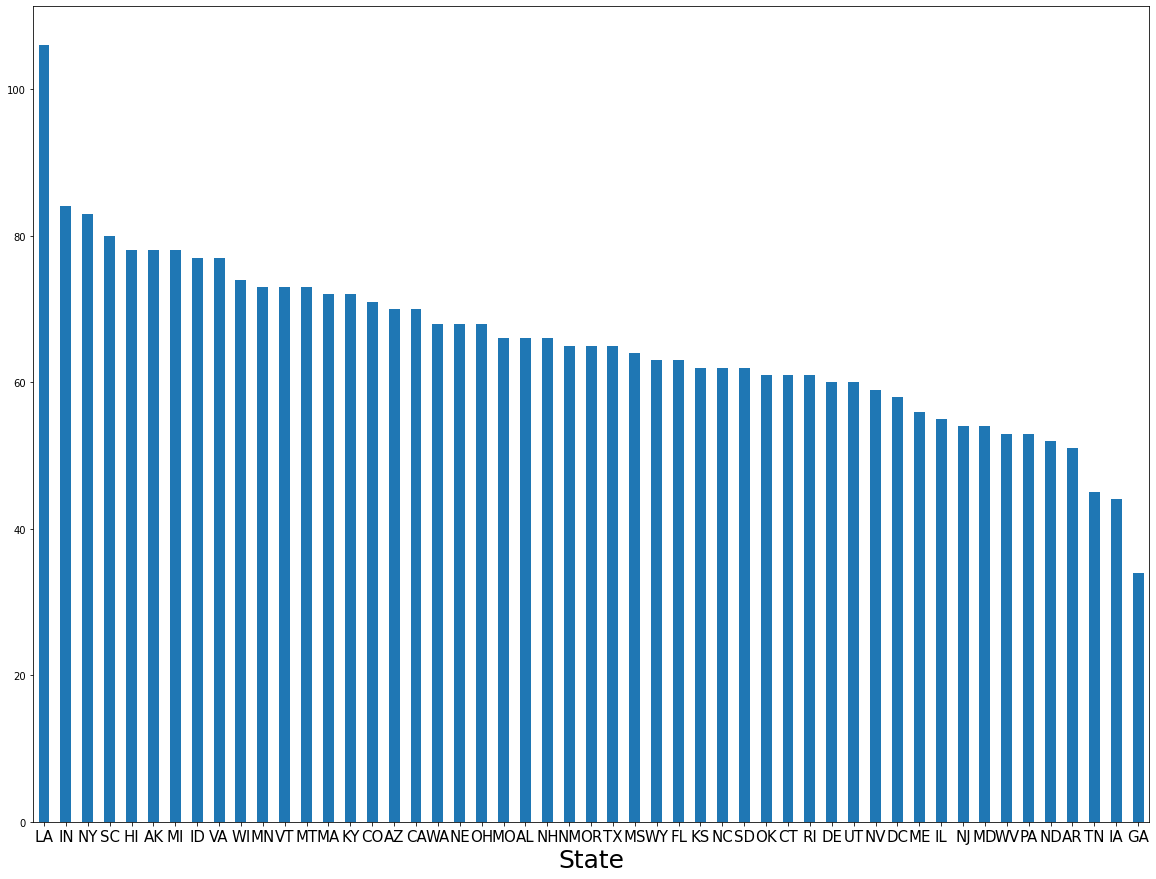

In [0]:
plt.figure(figsize=(20,15))
ax=data["State"].value_counts().plot.bar()
ax.set_xlabel('State',fontsize=25)
ax.set_xticklabels(('LA', 'IN', 'NY', 'SC', 'HI', 'AK' ,'MI', 'ID', 'VA', 'WI', 'MN',
                    'VT','MT','MA','KY','CO','AZ','CA','WA','NE','OH','MO','AL','NH','NM'
                    ,'OR','TX','MS','WY','FL','KS','NC','SD','OK','CT','RI','DE','UT','NV','DC','ME','IL',
 'NJ', 'MD' ,'WV', 'PA', 'ND', 'AR', 'TN', 'IA','GA'),rotation='horizontal', fontsize=15)
plt.show()

## Numerical Analysis

In [0]:
# function to create histogram, Q-Q plot and
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(20,15))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data = df, x = variable)

    plt.show()

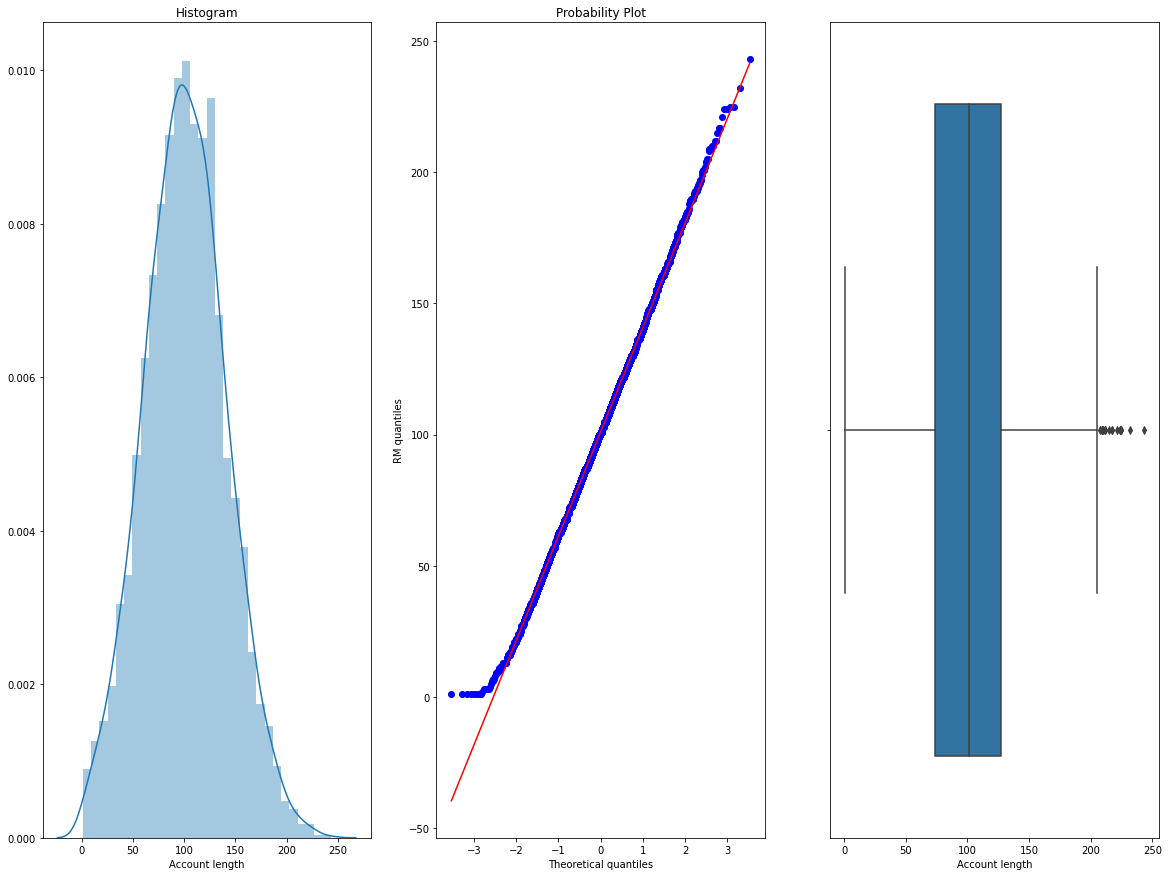

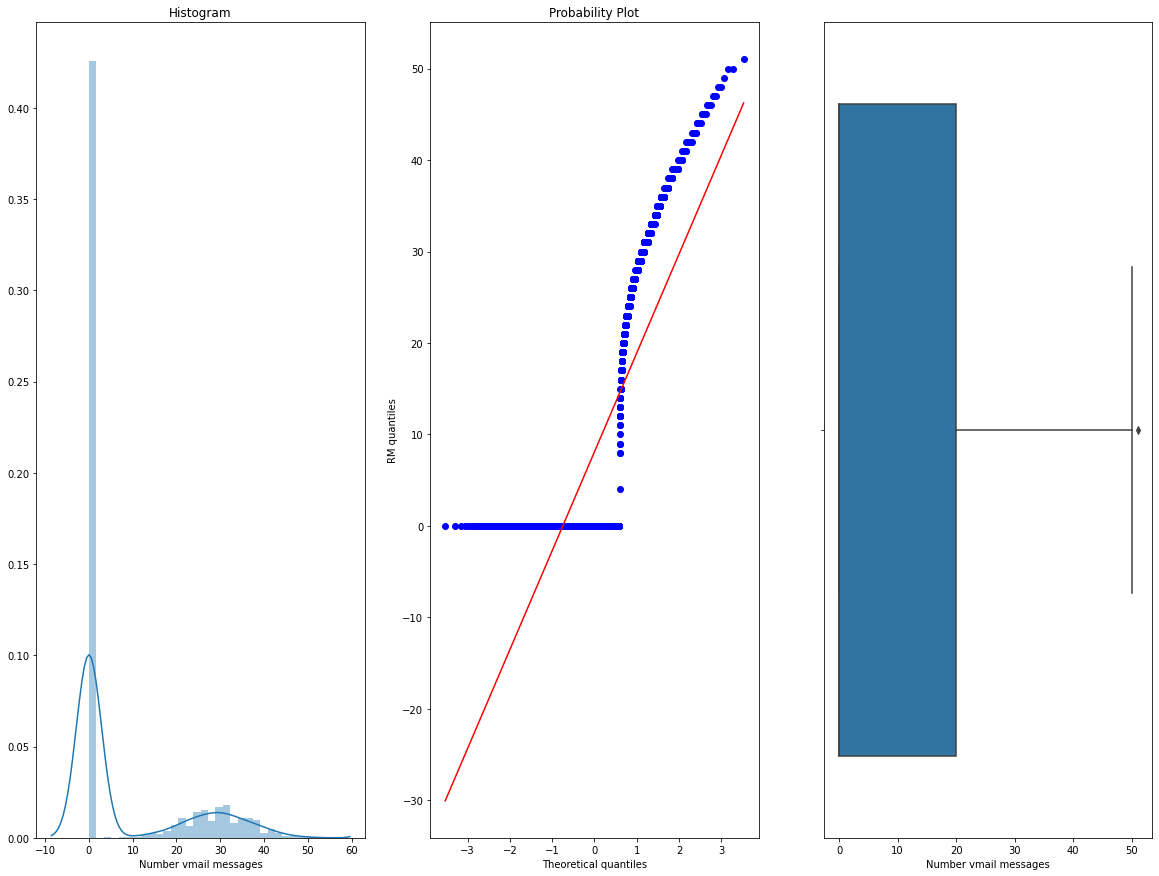

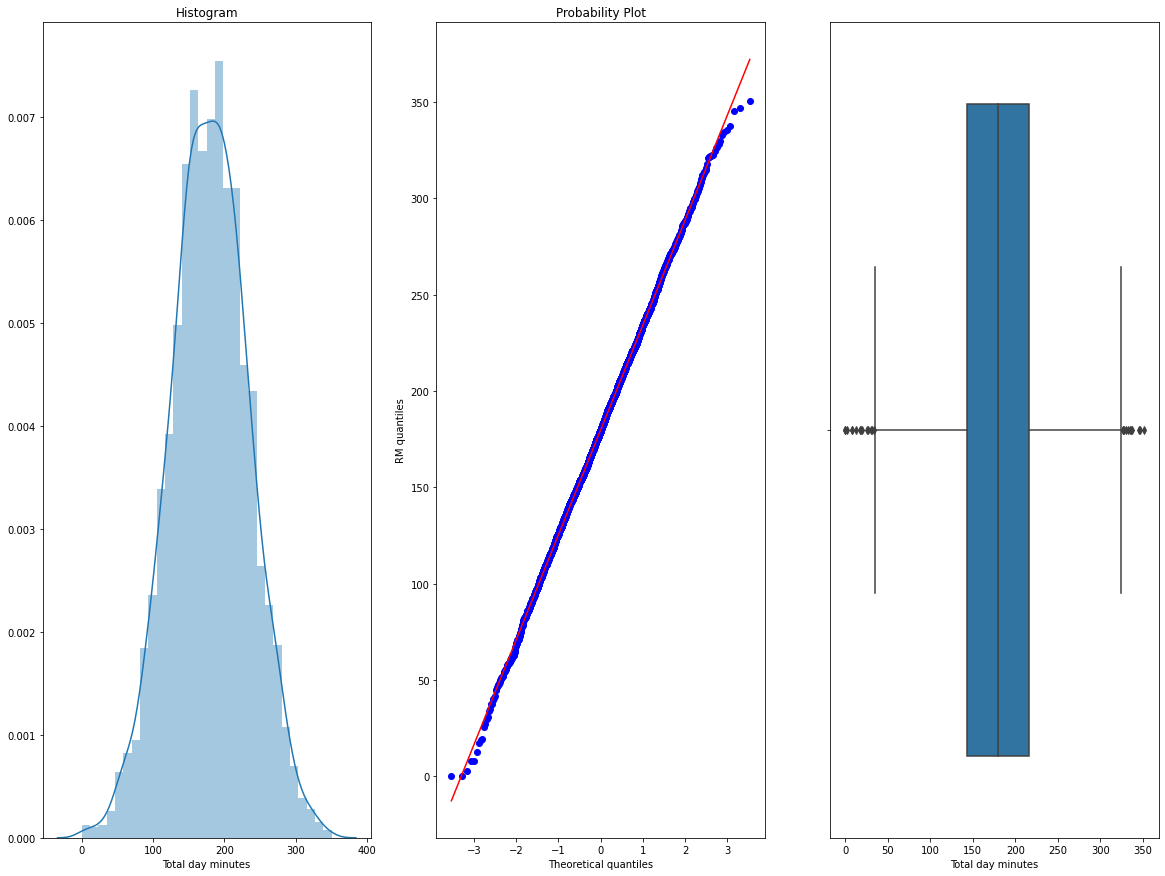

In [0]:
for num in numerical[0:3]:
    diagnostic_plots(data,num)
    

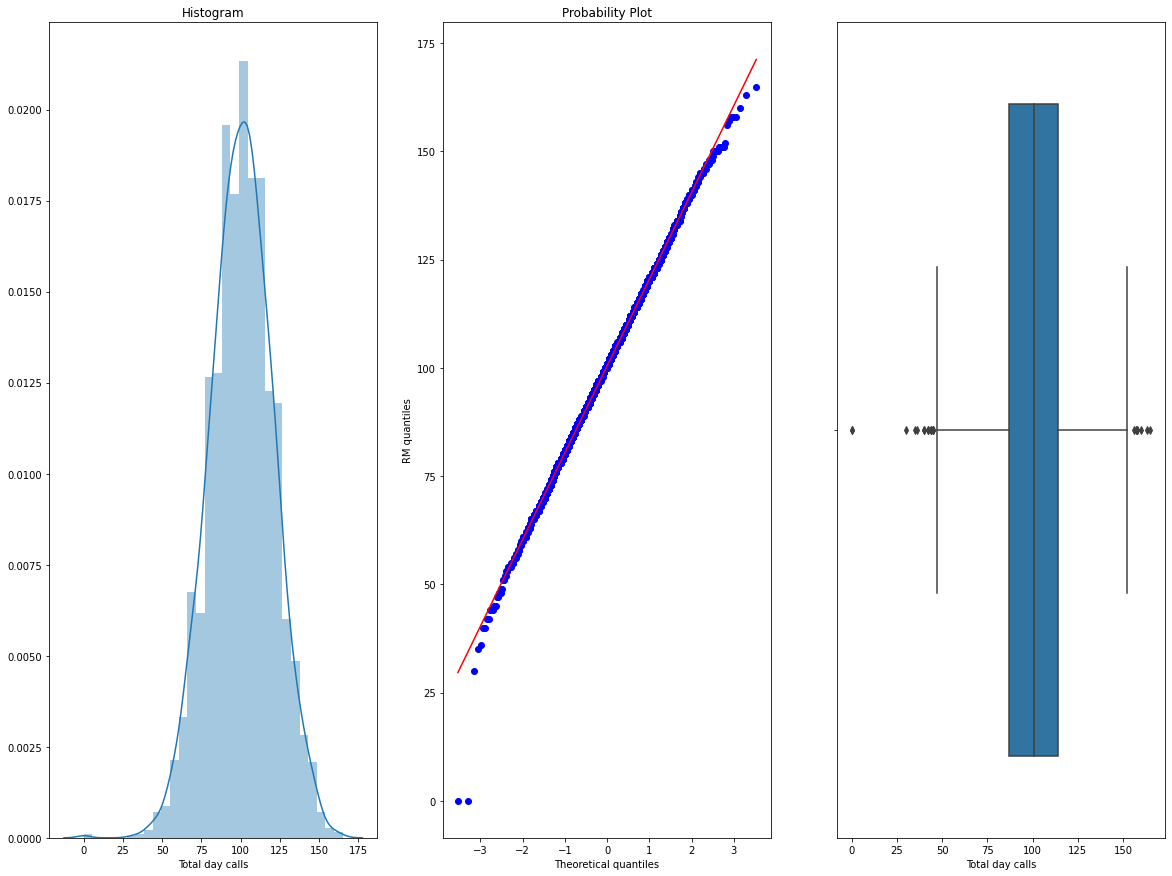

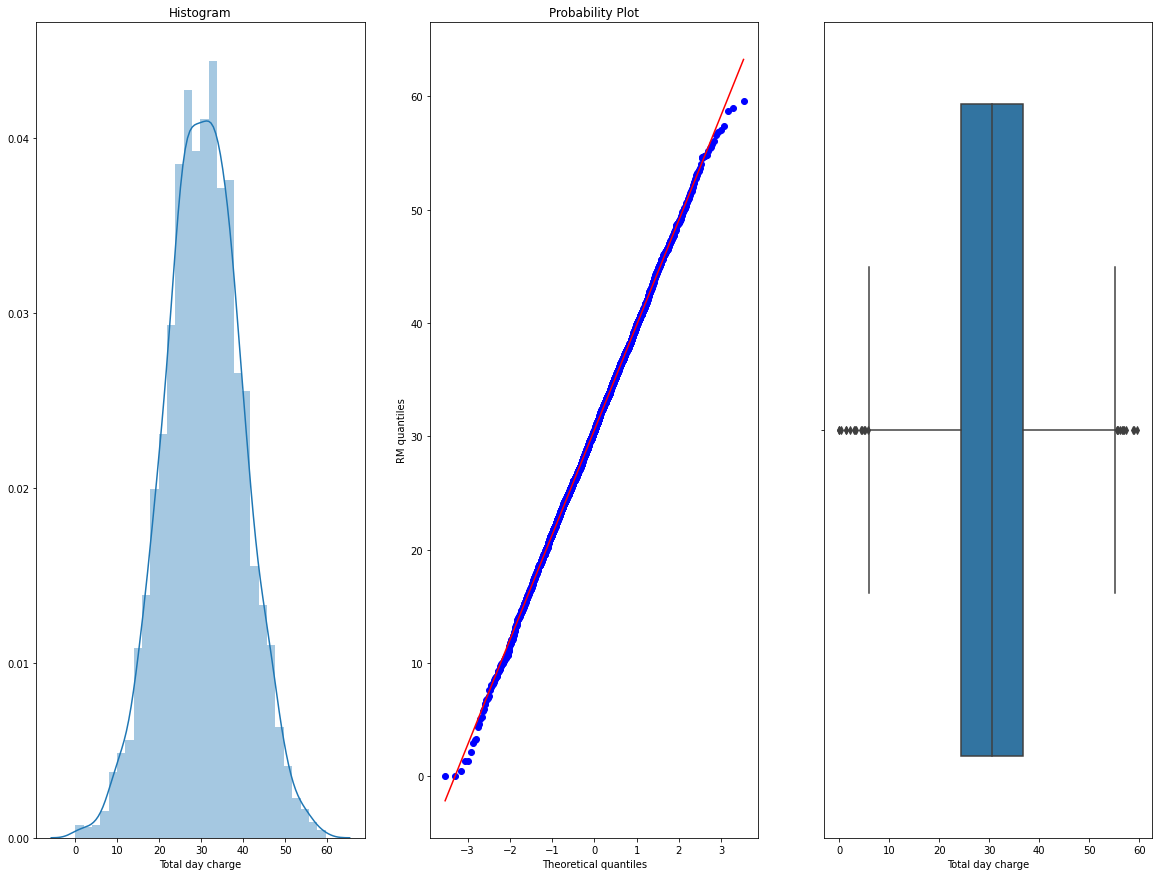

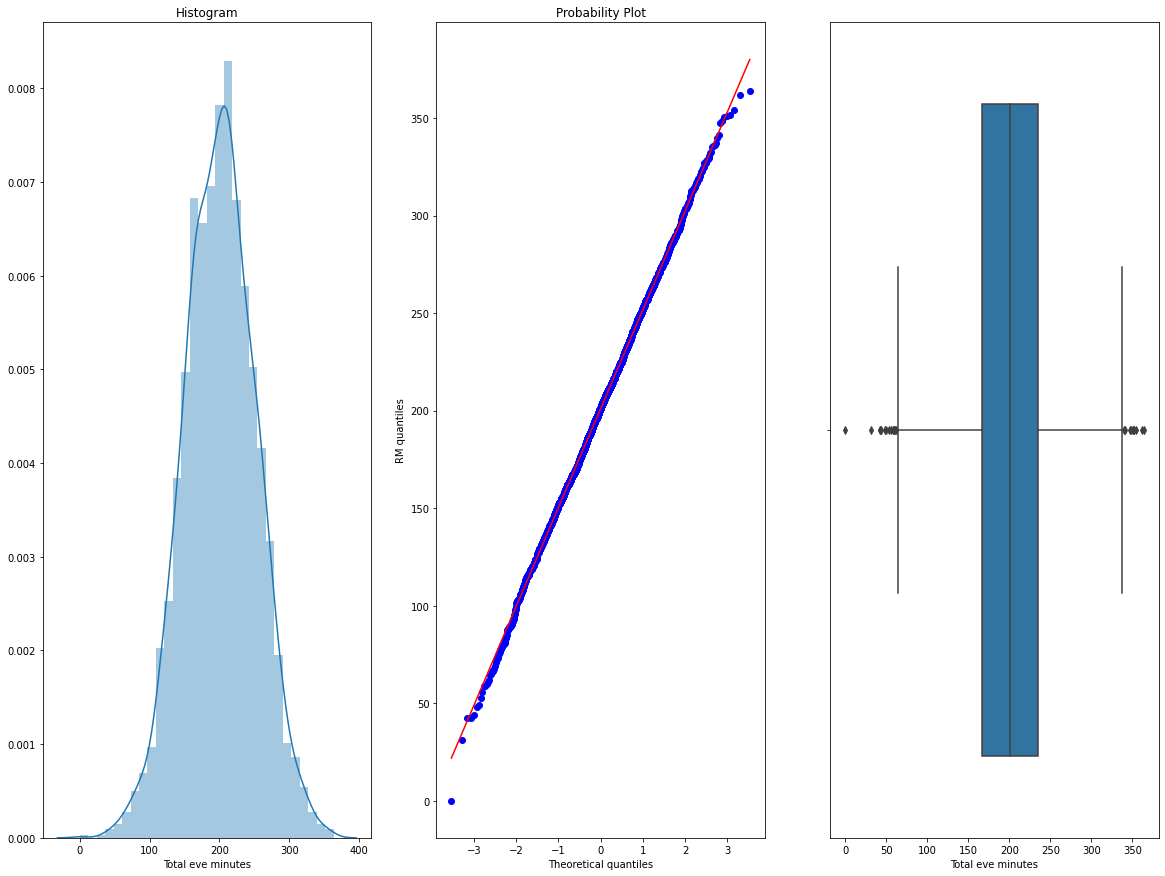

In [0]:
for num in numerical[3:6]:
    diagnostic_plots(data,num)
    

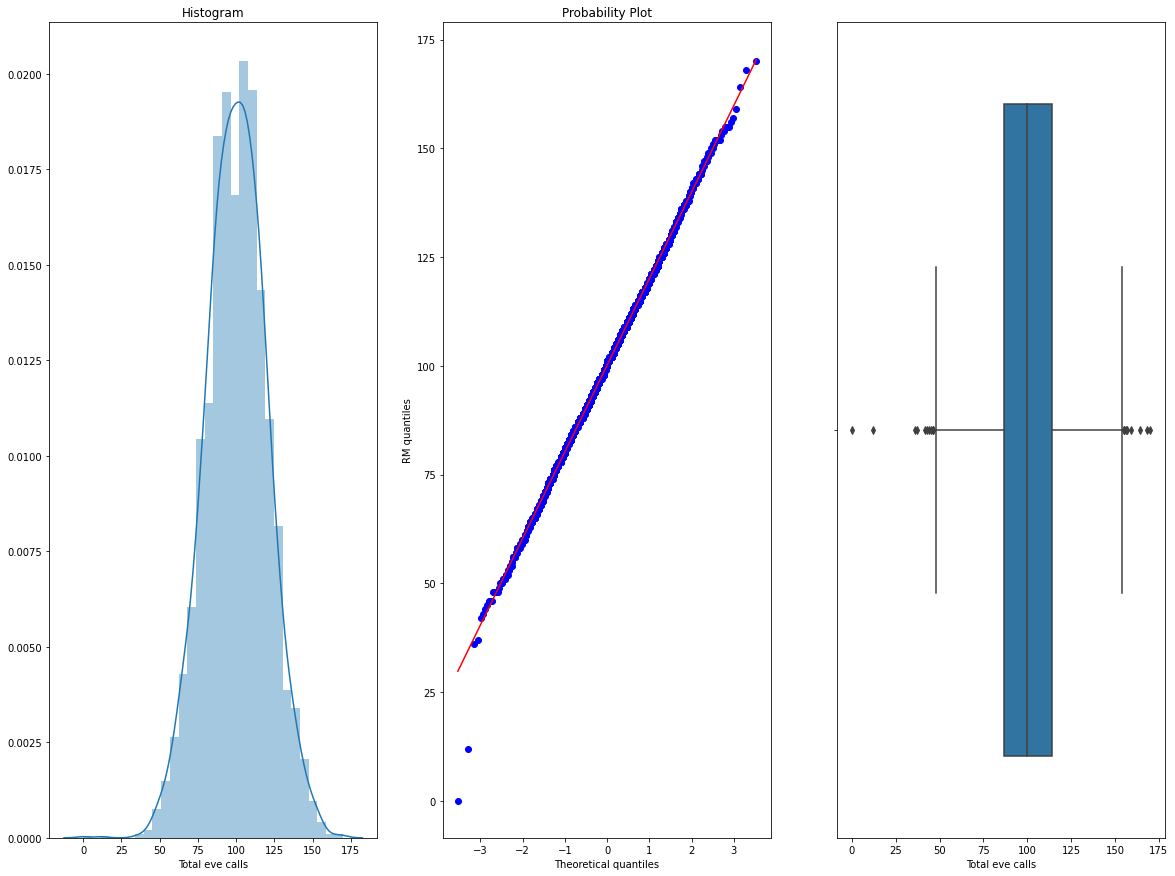

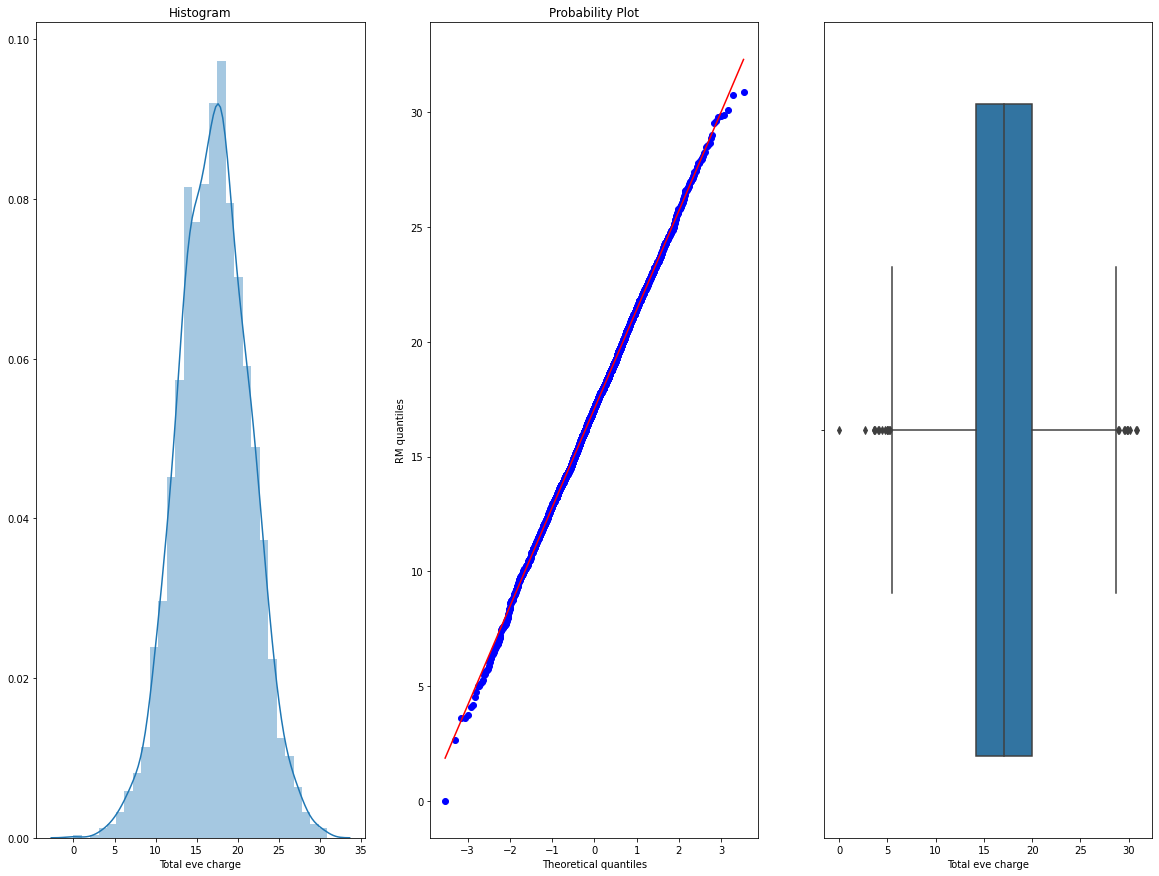

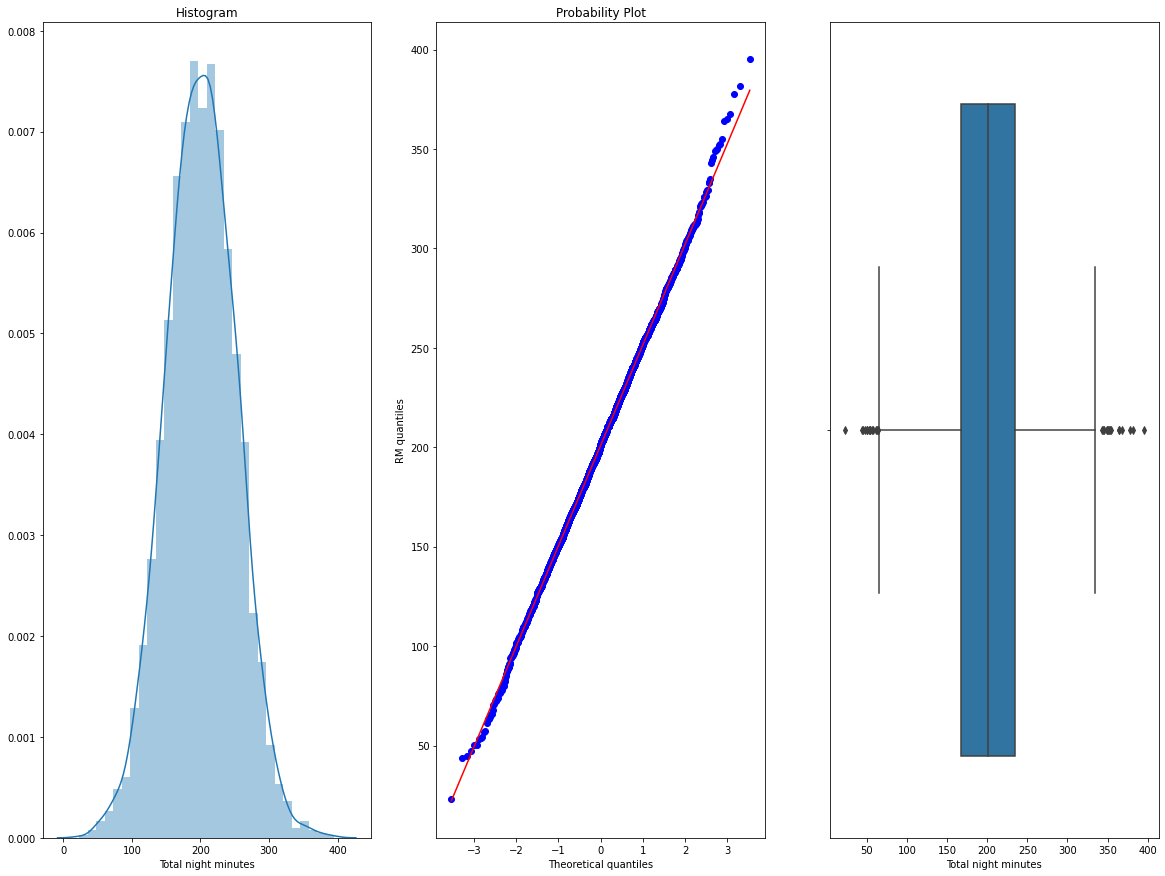

In [0]:
for num in numerical[6:9]:
    diagnostic_plots(data,num)
    

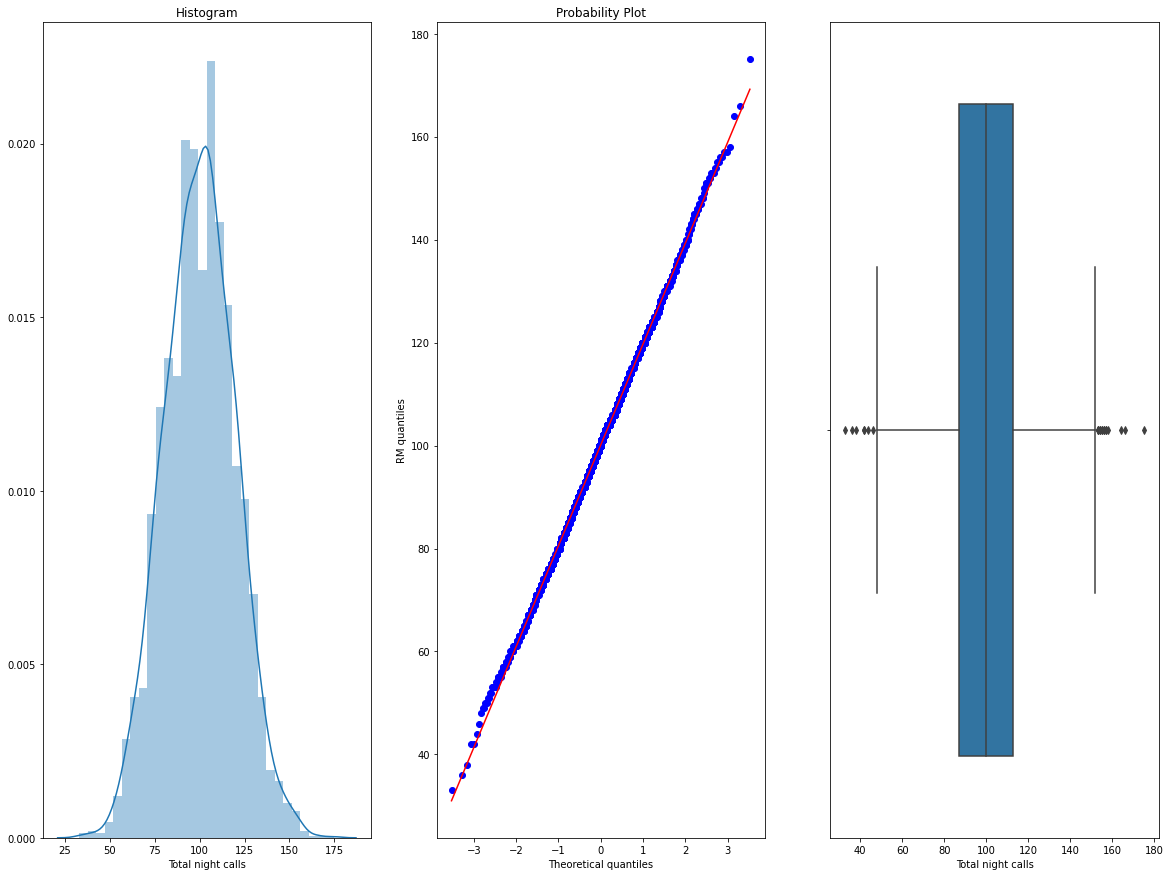

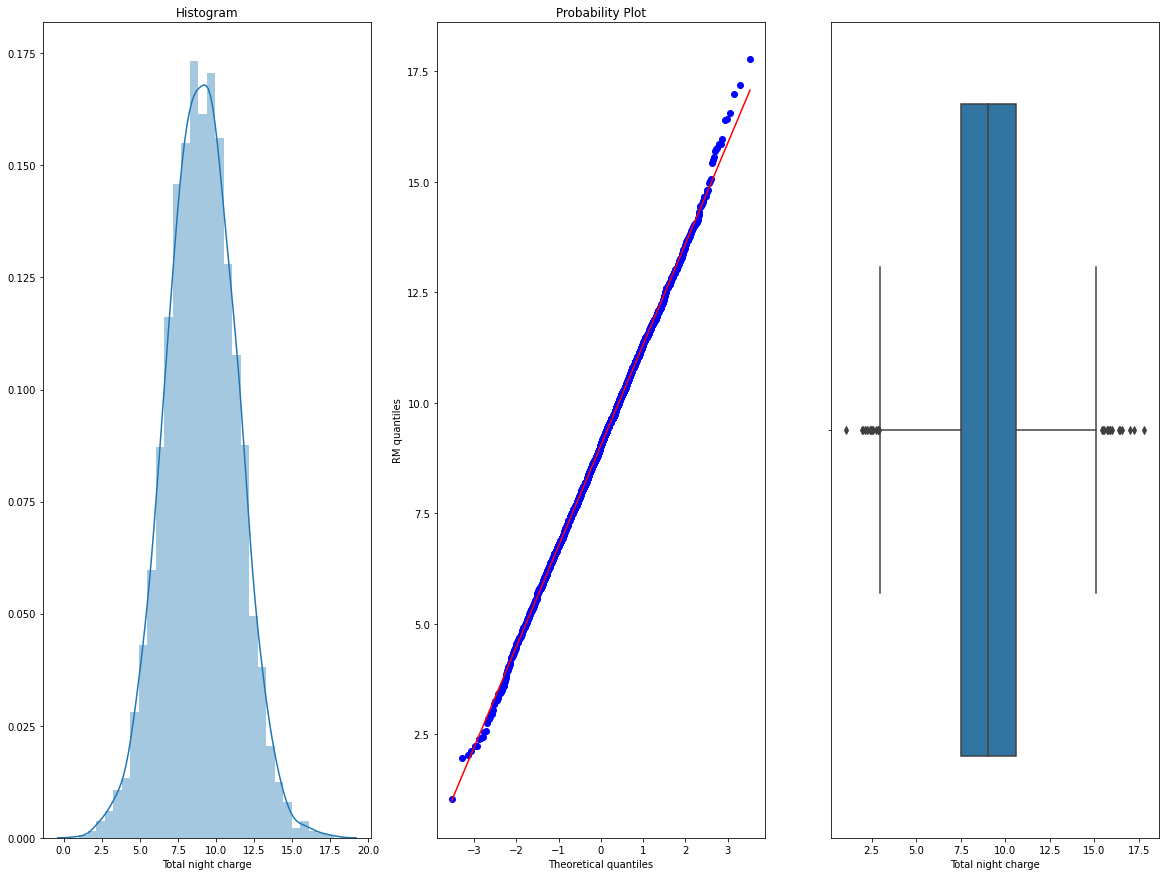

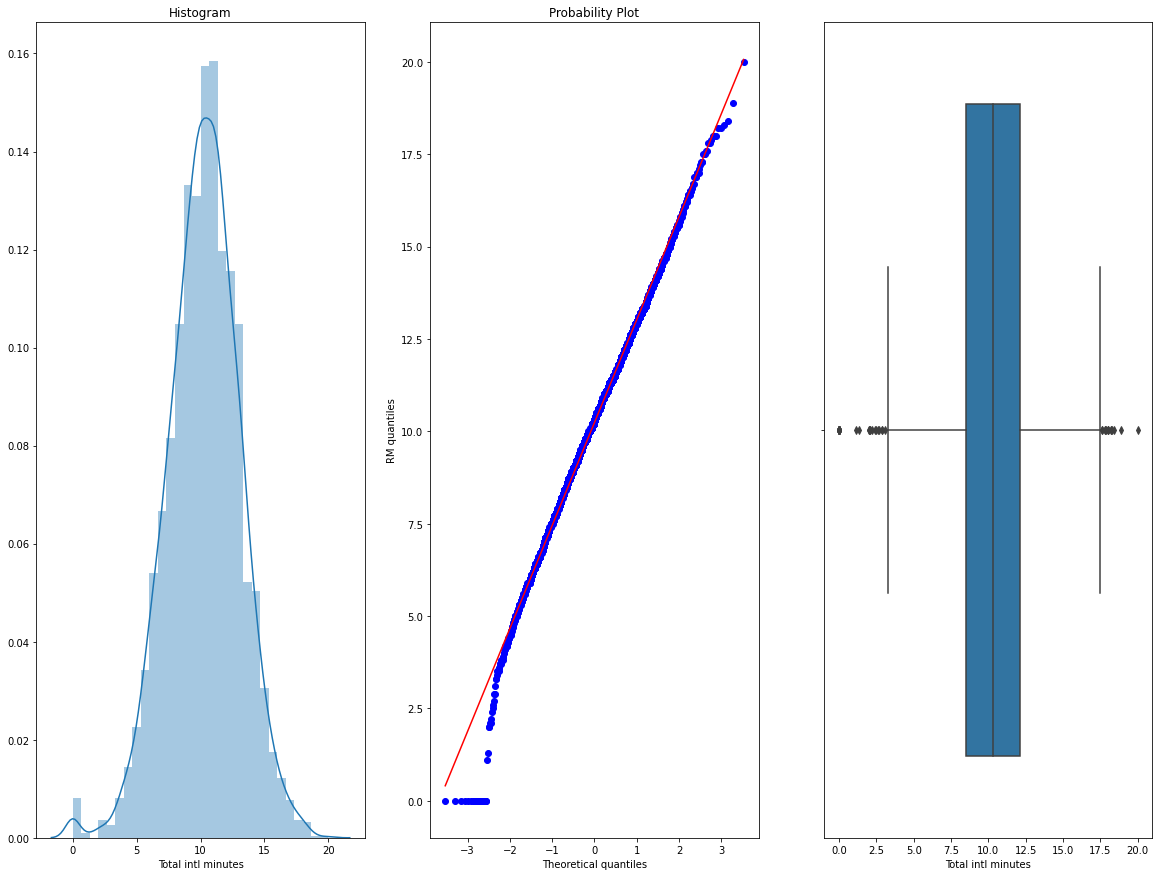

In [0]:
for num in numerical[9:12]:
    diagnostic_plots(data,num)
    

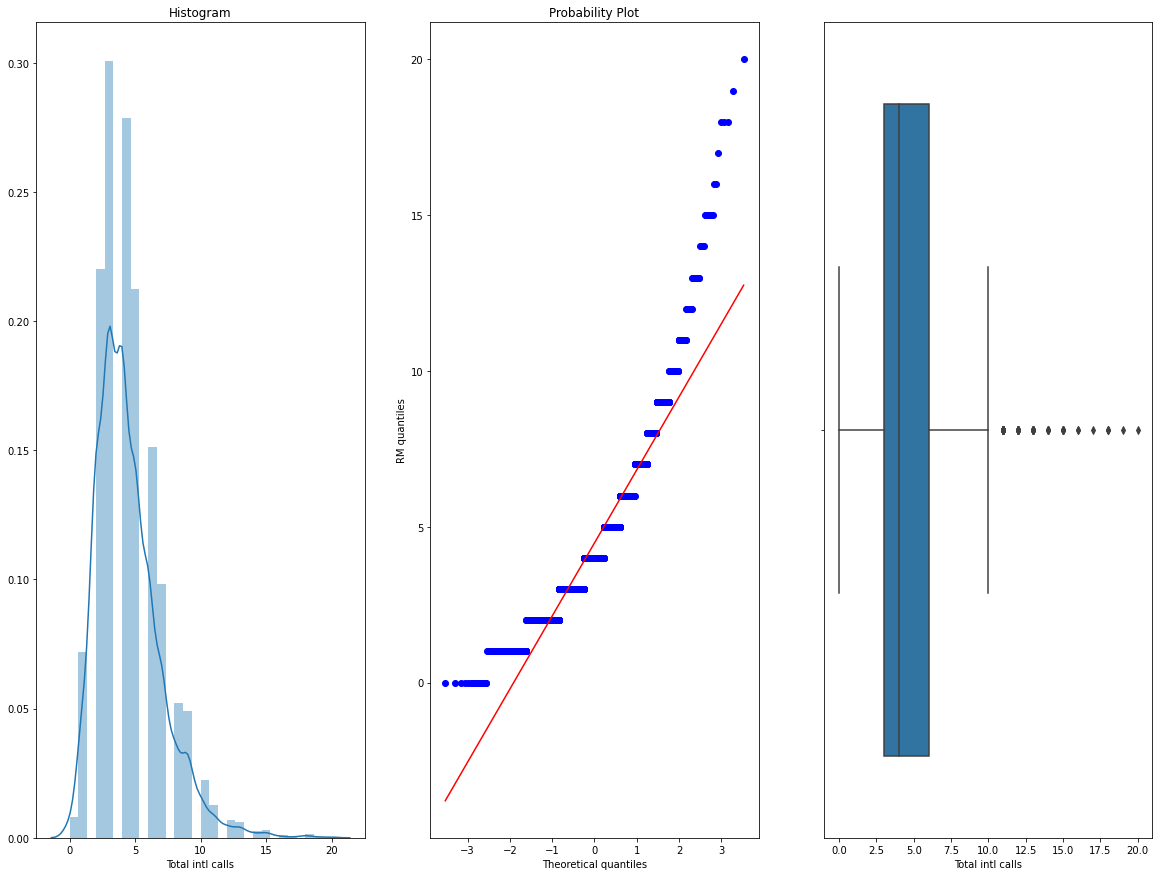

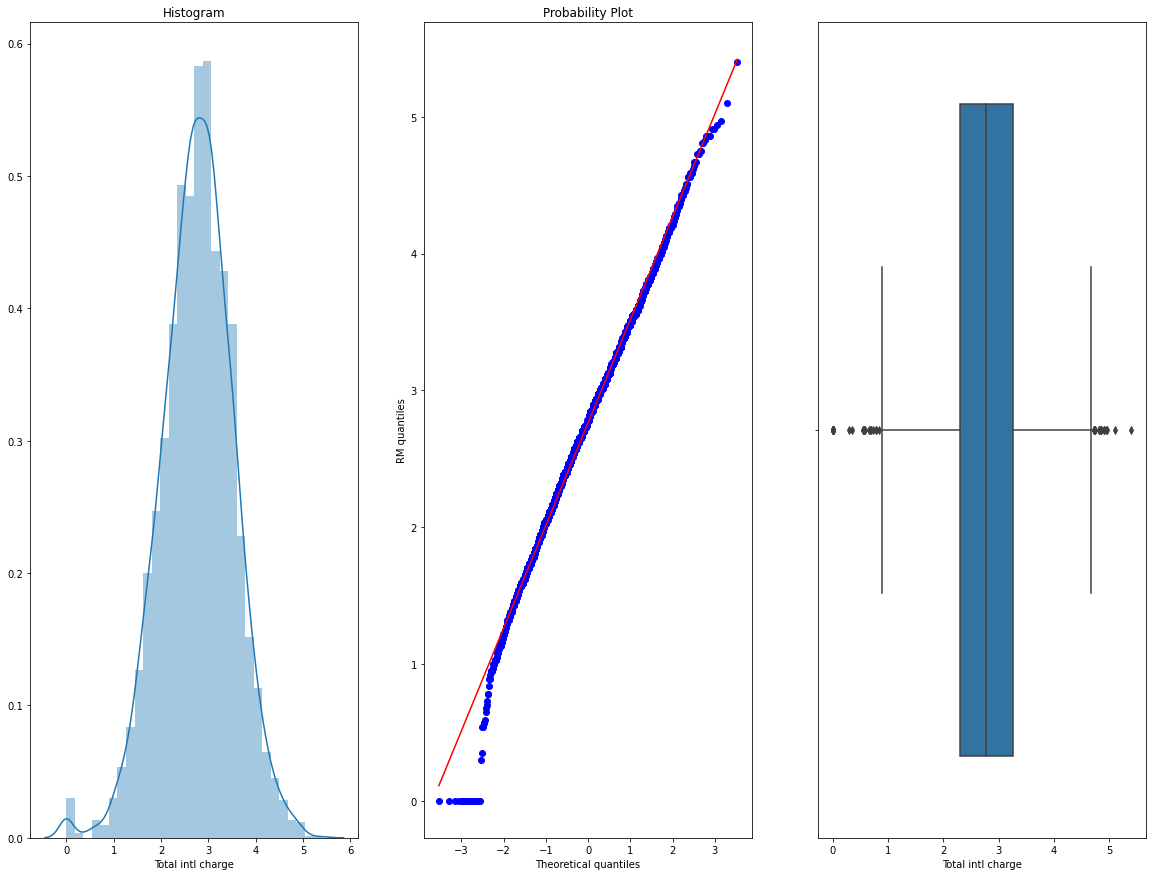

In [0]:
for num in numerical[12:15]:
    diagnostic_plots(data,num)
    

## Multivariet Analysis

<Figure size 1440x720 with 0 Axes>

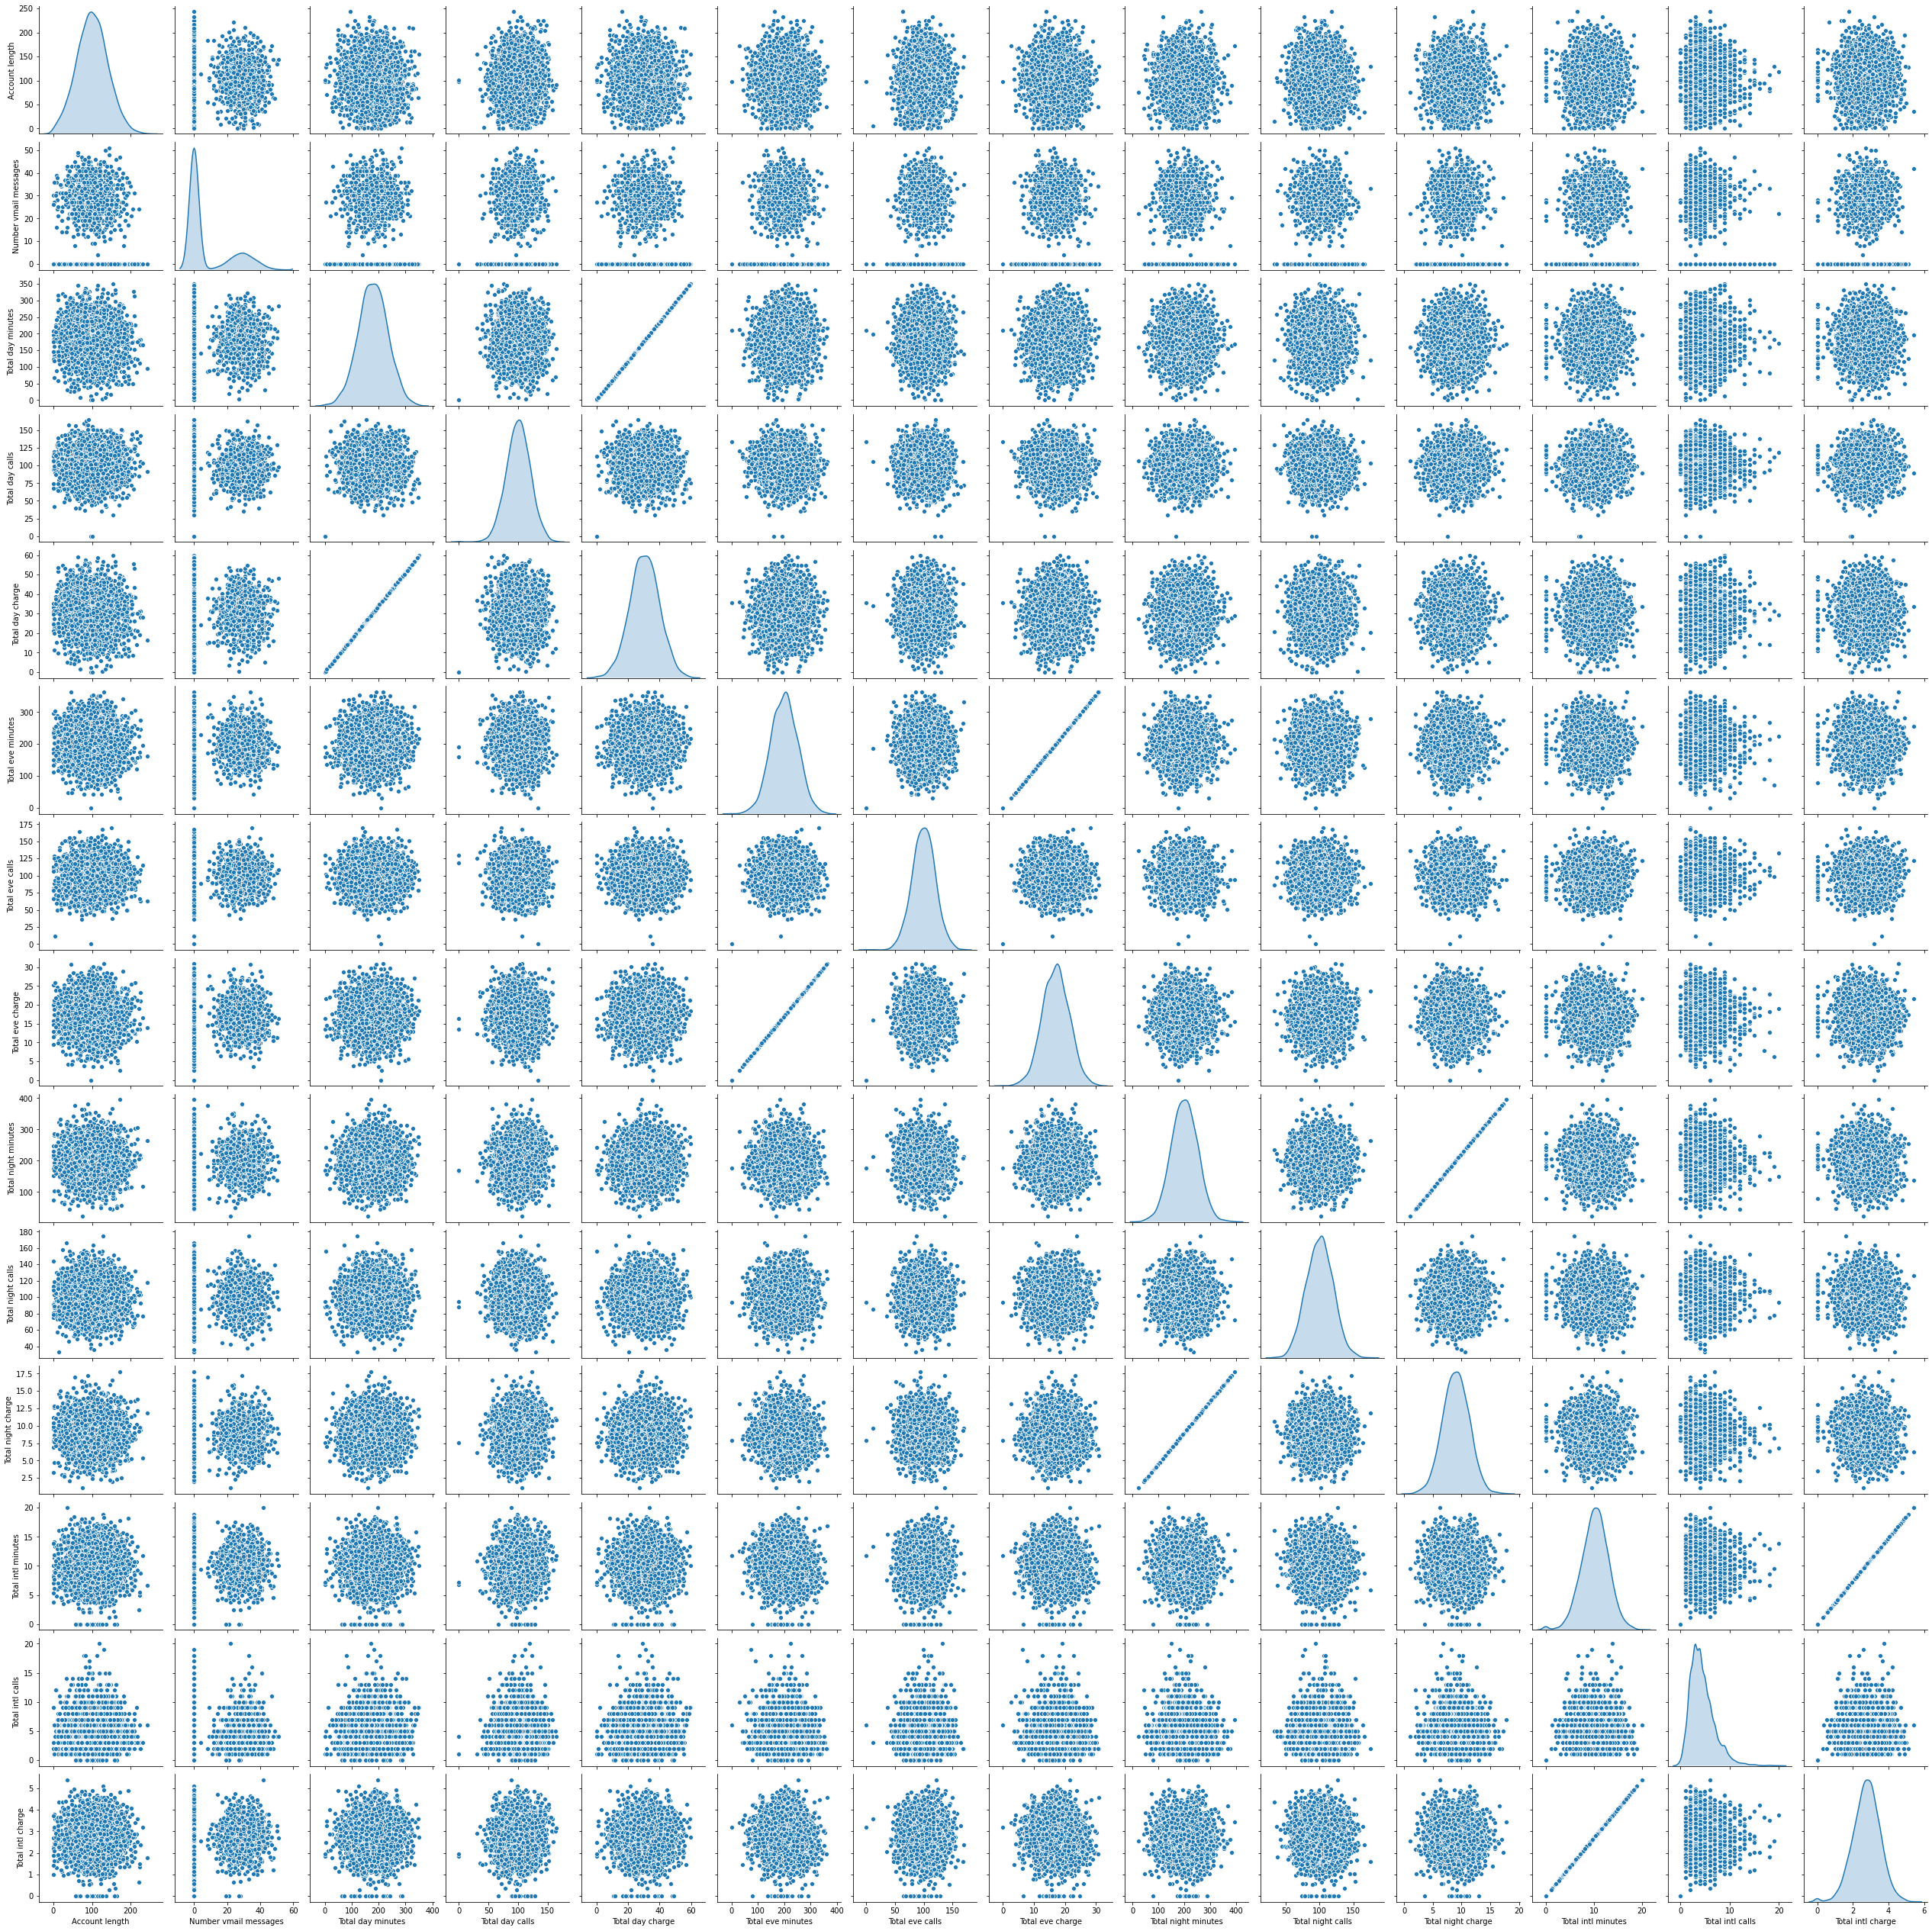

In [0]:
plt.figure(figsize=(20,10))

sns.pairplot(data[numerical],diag_kind="kde")
plt.show()

From above graph we conclude that Mostly feature have zero correlation

In [0]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Numerical Varibale Relation ship with Target 

In [0]:
numerical

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge']

<Figure size 720x360 with 0 Axes>

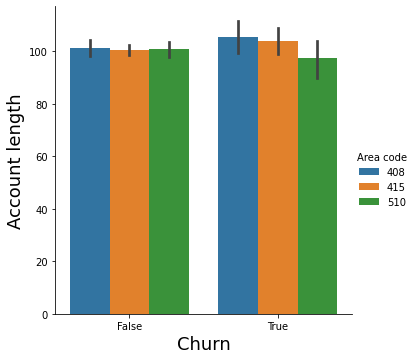

<Figure size 720x360 with 0 Axes>

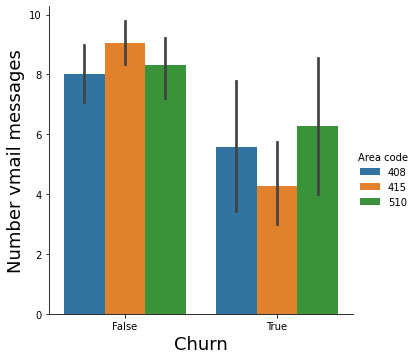

<Figure size 720x360 with 0 Axes>

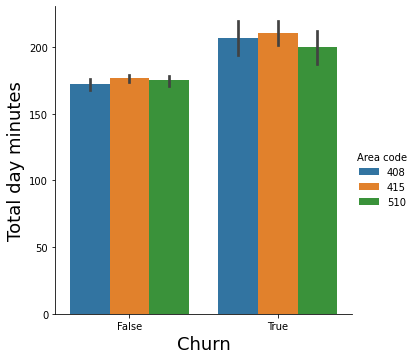

<Figure size 720x360 with 0 Axes>

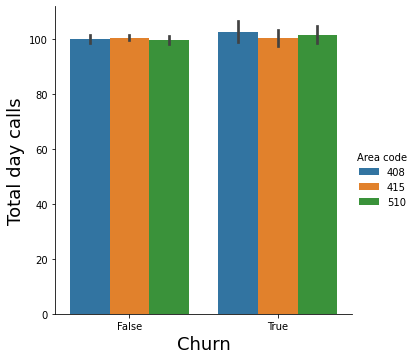

<Figure size 720x360 with 0 Axes>

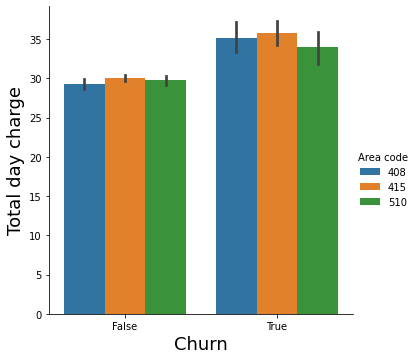

<Figure size 720x360 with 0 Axes>

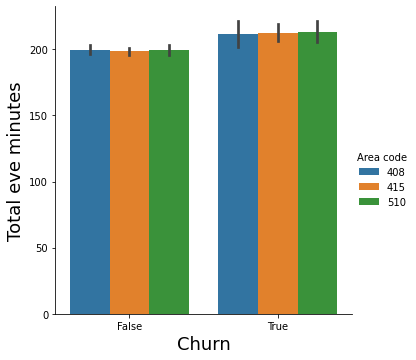

<Figure size 720x360 with 0 Axes>

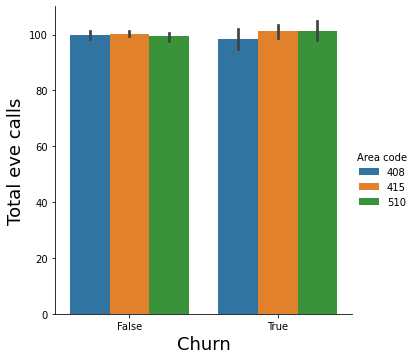

<Figure size 720x360 with 0 Axes>

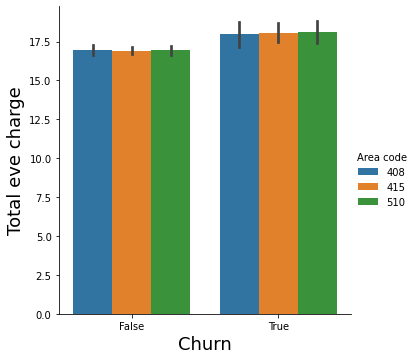

<Figure size 720x360 with 0 Axes>

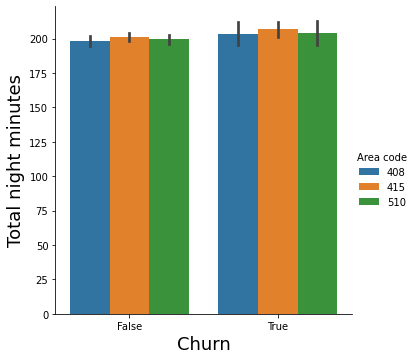

<Figure size 720x360 with 0 Axes>

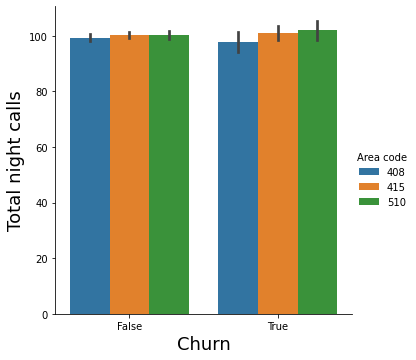

<Figure size 720x360 with 0 Axes>

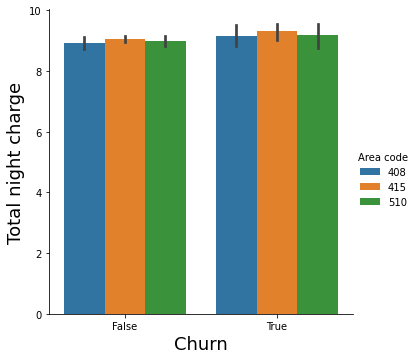

<Figure size 720x360 with 0 Axes>

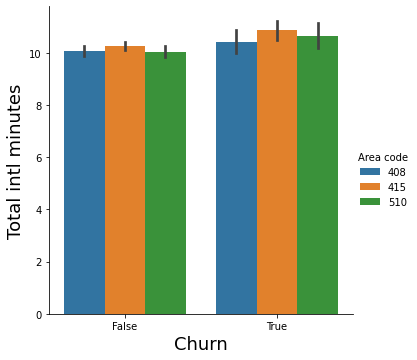

<Figure size 720x360 with 0 Axes>

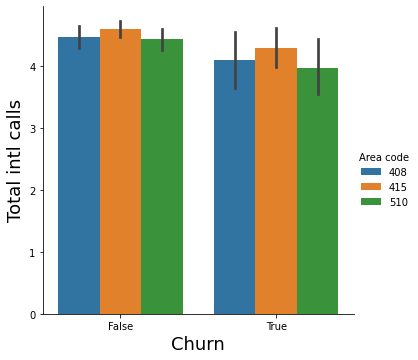

<Figure size 720x360 with 0 Axes>

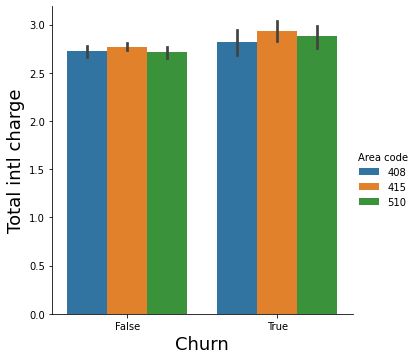

<Figure size 720x360 with 0 Axes>

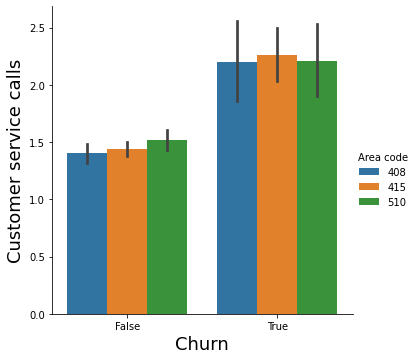

In [0]:
#With Hue By Area
list1=["Account length","Number vmail messages","Total day minutes","Total day calls",
            "Total day charge","Total eve minutes","Total eve calls",
            "Total eve charge","Total night minutes","Total night calls",
             "Total night charge","Total intl minutes","Total intl calls",
             "Total intl charge","Customer service calls",
     "State","Area code","International plan","Voice mail plan","Churn"]
for num in data[list1[0:15]]:
    plt.figure(figsize=(10,5))
    sns.catplot(x='Churn', y=num, hue="Area code",kind='bar', data=data)
    plt.xlabel('Churn', fontsize = 18)
    plt.ylabel(num, fontsize = 18)
    plt.show()

<Figure size 720x360 with 0 Axes>

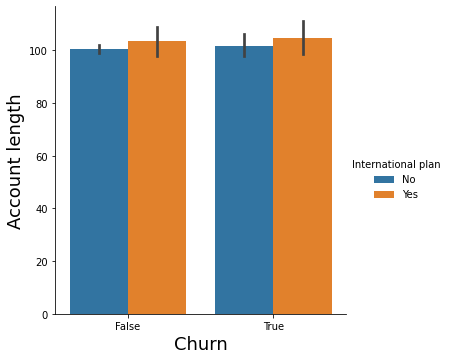

<Figure size 720x360 with 0 Axes>

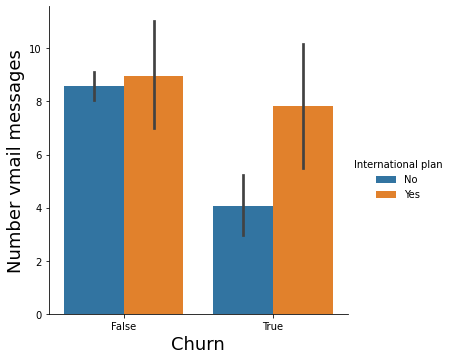

<Figure size 720x360 with 0 Axes>

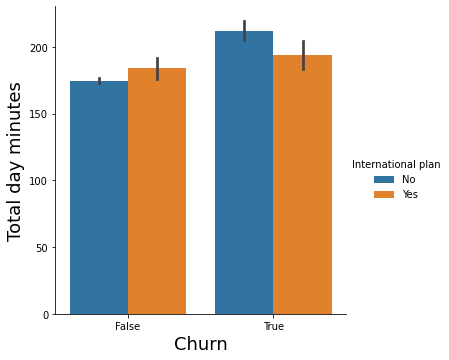

<Figure size 720x360 with 0 Axes>

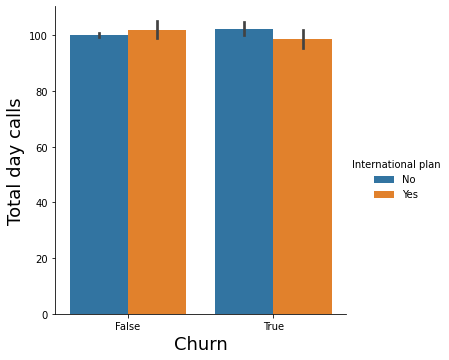

<Figure size 720x360 with 0 Axes>

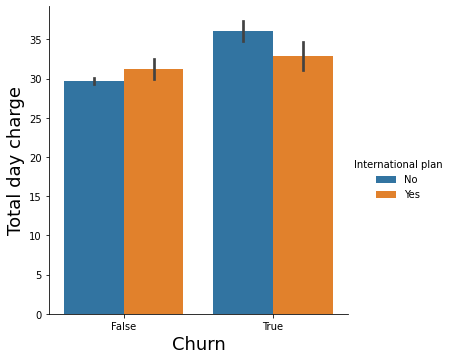

<Figure size 720x360 with 0 Axes>

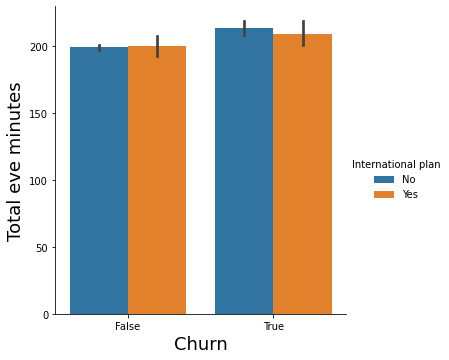

<Figure size 720x360 with 0 Axes>

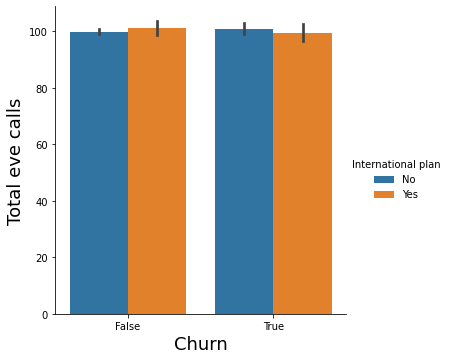

<Figure size 720x360 with 0 Axes>

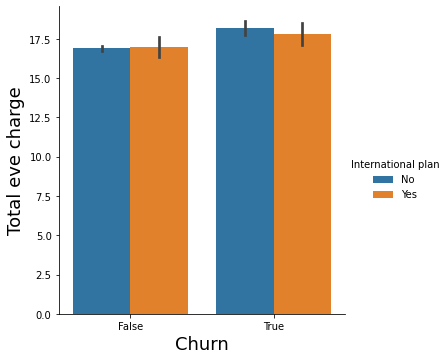

<Figure size 720x360 with 0 Axes>

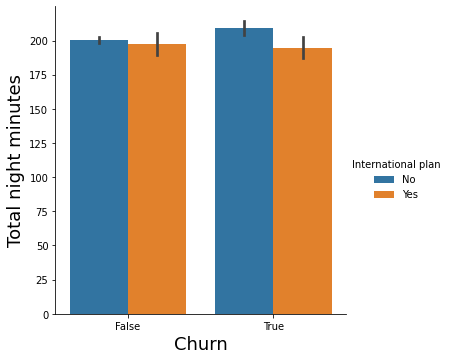

<Figure size 720x360 with 0 Axes>

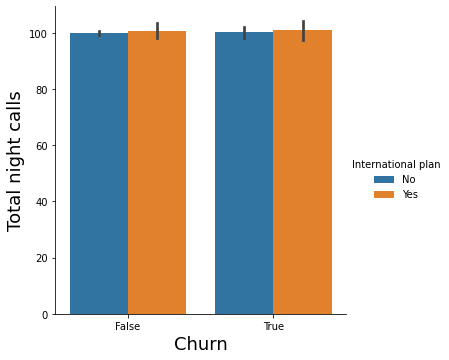

<Figure size 720x360 with 0 Axes>

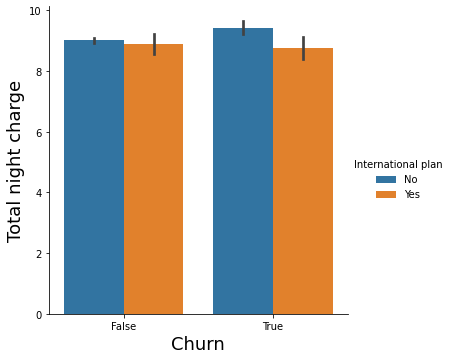

<Figure size 720x360 with 0 Axes>

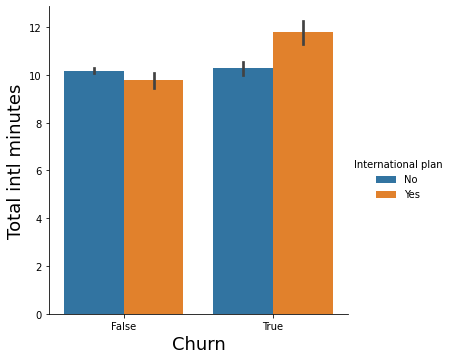

<Figure size 720x360 with 0 Axes>

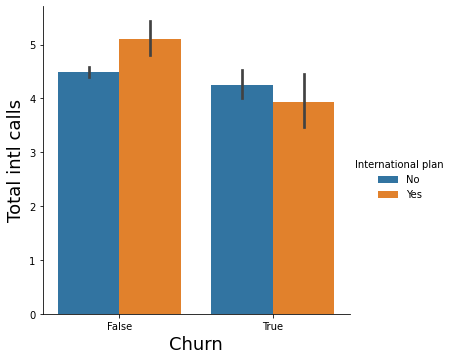

<Figure size 720x360 with 0 Axes>

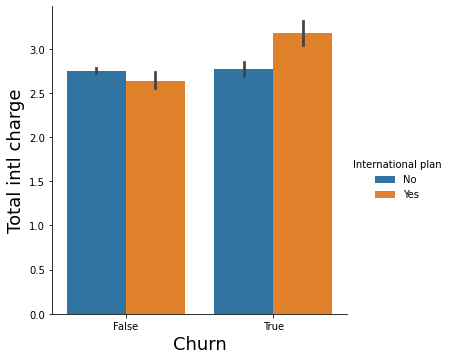

<Figure size 720x360 with 0 Axes>

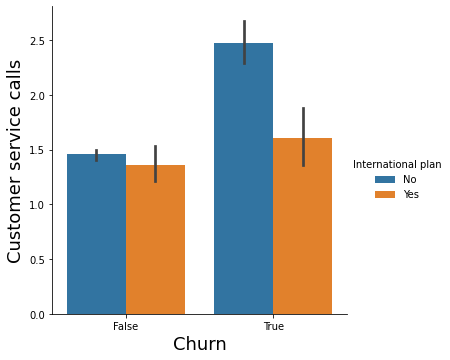

In [0]:
for num in data[list1[0:15]]:
    plt.figure(figsize=(10,5))
    sns.catplot(x='Churn', y=num, hue="International plan",kind='bar', data=data)
    plt.xlabel('Churn', fontsize = 18)
    plt.ylabel(num, fontsize = 18)
    plt.show()

<Figure size 720x360 with 0 Axes>

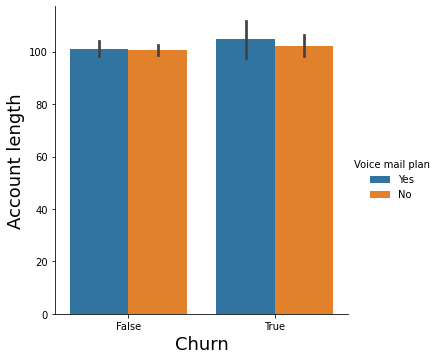

<Figure size 720x360 with 0 Axes>

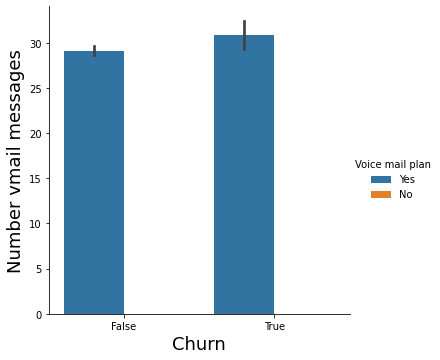

<Figure size 720x360 with 0 Axes>

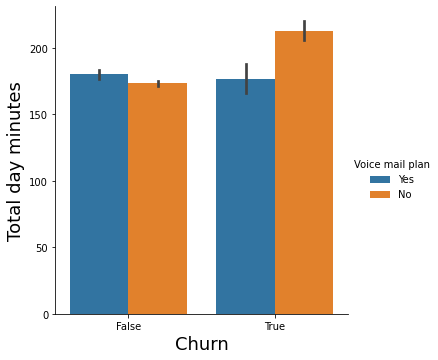

<Figure size 720x360 with 0 Axes>

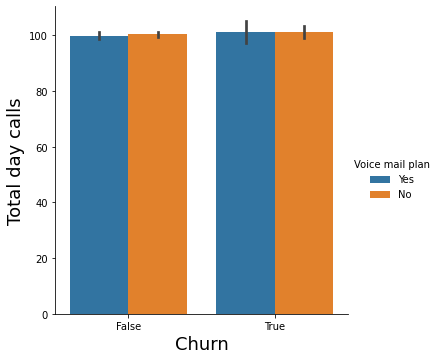

<Figure size 720x360 with 0 Axes>

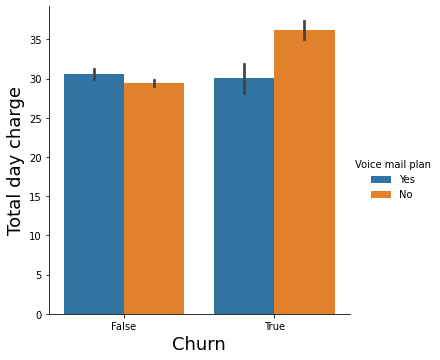

<Figure size 720x360 with 0 Axes>

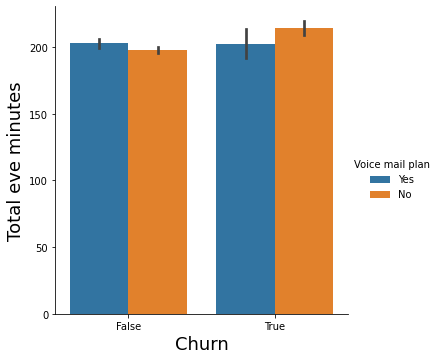

<Figure size 720x360 with 0 Axes>

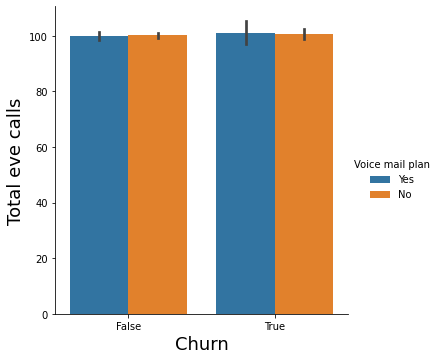

<Figure size 720x360 with 0 Axes>

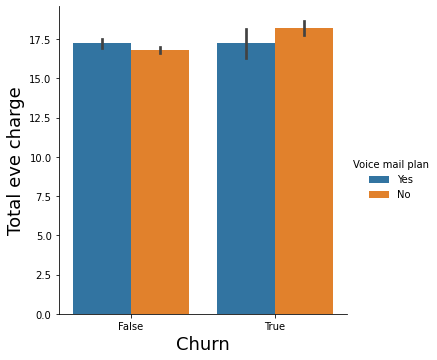

<Figure size 720x360 with 0 Axes>

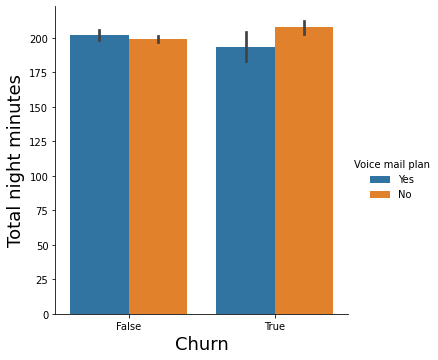

<Figure size 720x360 with 0 Axes>

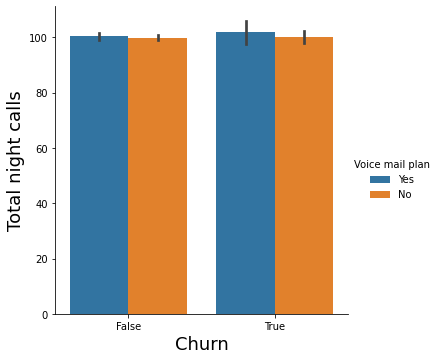

<Figure size 720x360 with 0 Axes>

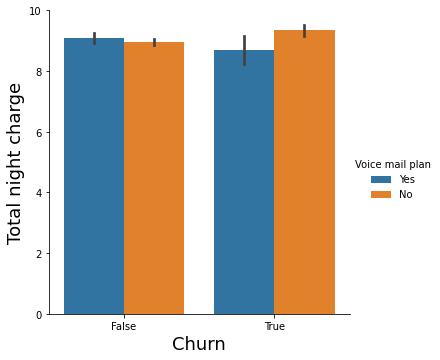

<Figure size 720x360 with 0 Axes>

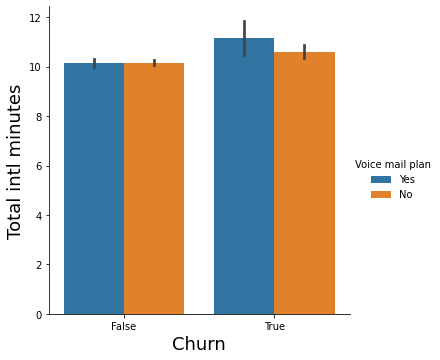

<Figure size 720x360 with 0 Axes>

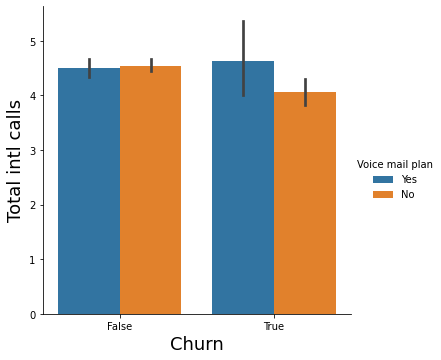

<Figure size 720x360 with 0 Axes>

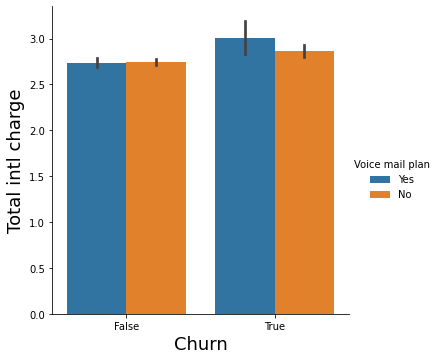

<Figure size 720x360 with 0 Axes>

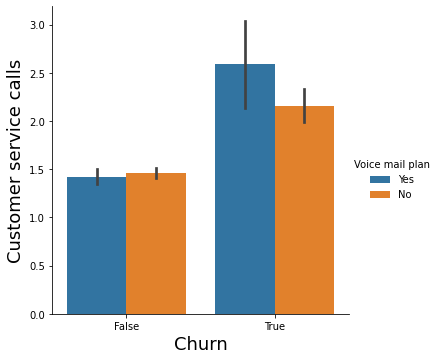

In [0]:
for num in data[list1[0:15]]:
    plt.figure(figsize=(10,5))
    sns.catplot(x='Churn', y=num, hue="Voice mail plan",kind='bar', data=data)
    plt.xlabel('Churn', fontsize = 18)
    plt.ylabel(num, fontsize = 18)
    plt.show()

## Categorical Varaible Relationship with Target

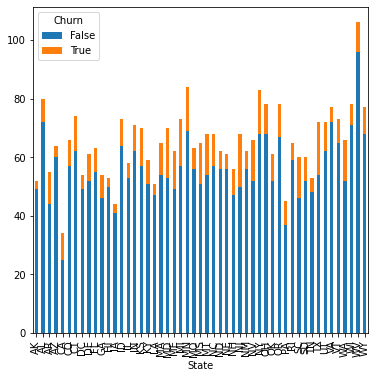

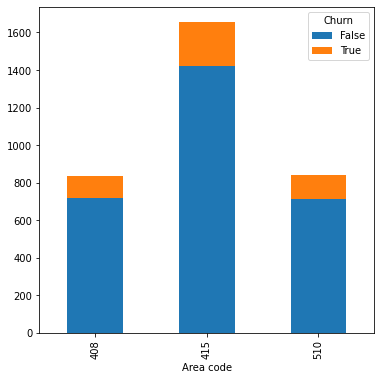

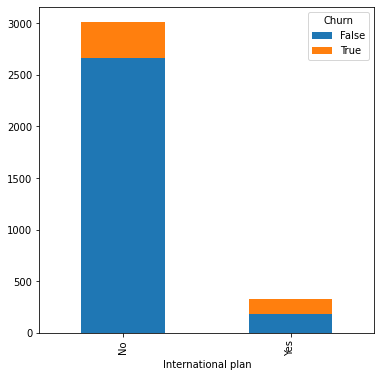

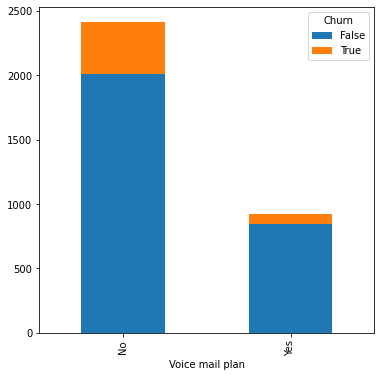

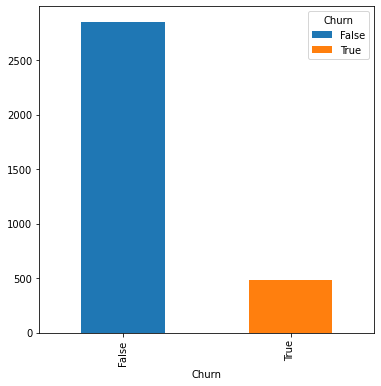

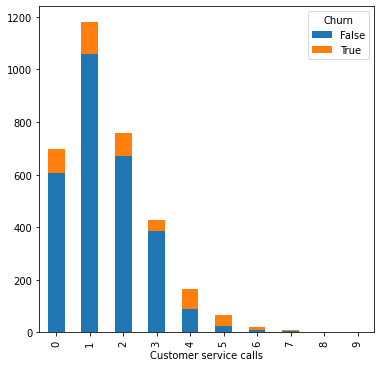

In [0]:
for cat in categorical:
    tab = pd.crosstab(data[cat],data["Churn"])
    tab.plot(kind ='bar',figsize=(6,6),stacked=True)

## Numerical to Numerical Analysis

In [0]:
numerical

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge']

### Relationship between Calls and Charge

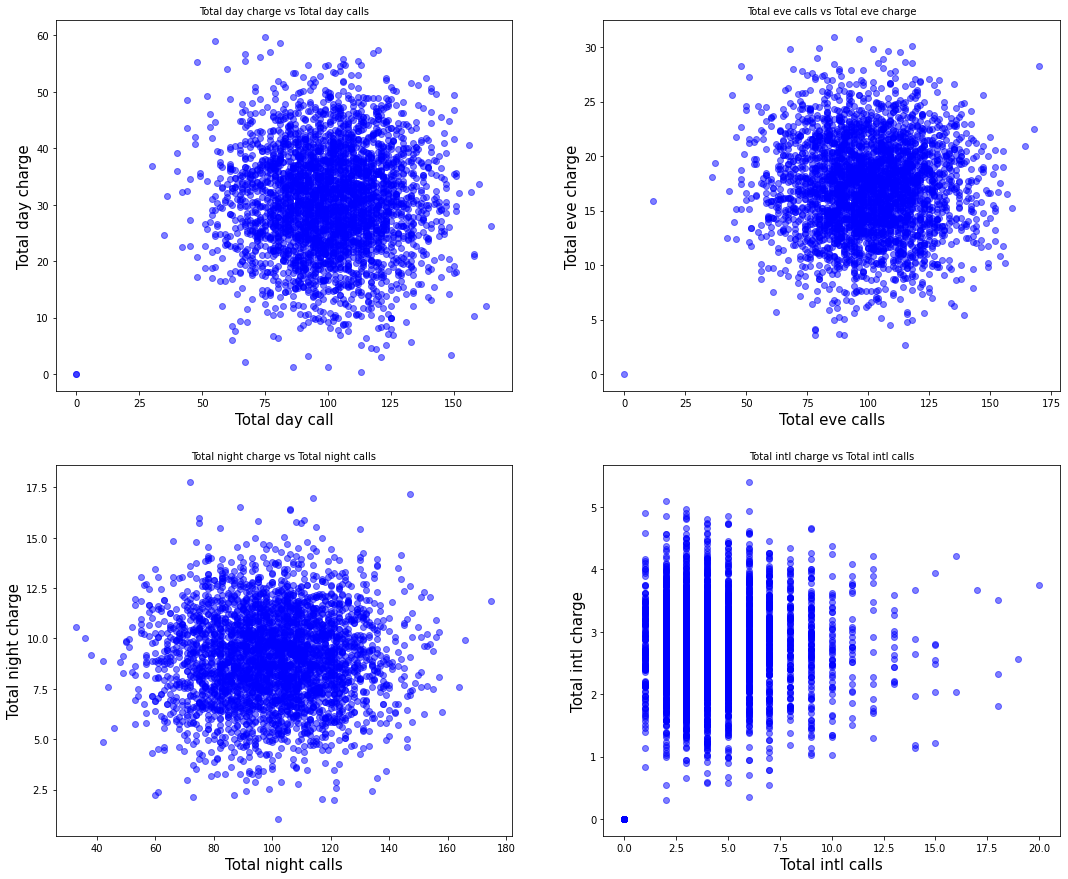

In [0]:

plt.figure(figsize=(18,15))
plt.subplot(2, 2, 1)
plt.scatter(data['Total day calls'], data['Total day charge'],c='blue', alpha=0.5)
plt.title('Total day charge vs Total day calls', fontsize = 10)
plt.xlabel('Total day call', fontsize = 15)
plt.ylabel('Total day charge', fontsize = 15)


plt.subplot(2, 2, 2)
plt.scatter(data['Total eve calls'], data['Total eve charge'],c='blue', alpha=0.5)
plt.title('Total eve calls vs Total eve charge', fontsize = 10)
plt.xlabel('Total eve calls', fontsize = 15)
plt.ylabel('Total eve charge', fontsize = 15)

plt.subplot(2, 2, 3)
plt.scatter(data['Total night calls'], data['Total night charge'],c='blue', alpha=0.5)
plt.title('Total night charge vs Total night calls', fontsize = 10)
plt.xlabel('Total night calls', fontsize = 15)
plt.ylabel('Total night charge', fontsize = 15)

plt.subplot(2, 2, 4)
plt.scatter(data['Total intl calls'], data['Total intl charge'],c='blue', alpha=0.5)
plt.title('Total intl charge vs Total intl calls', fontsize = 10)
plt.xlabel('Total intl calls', fontsize = 15)
plt.ylabel('Total intl charge', fontsize = 15)


plt.show()

This represent non linear Relation so correlation between them 

### Relationship between minutes and Charge


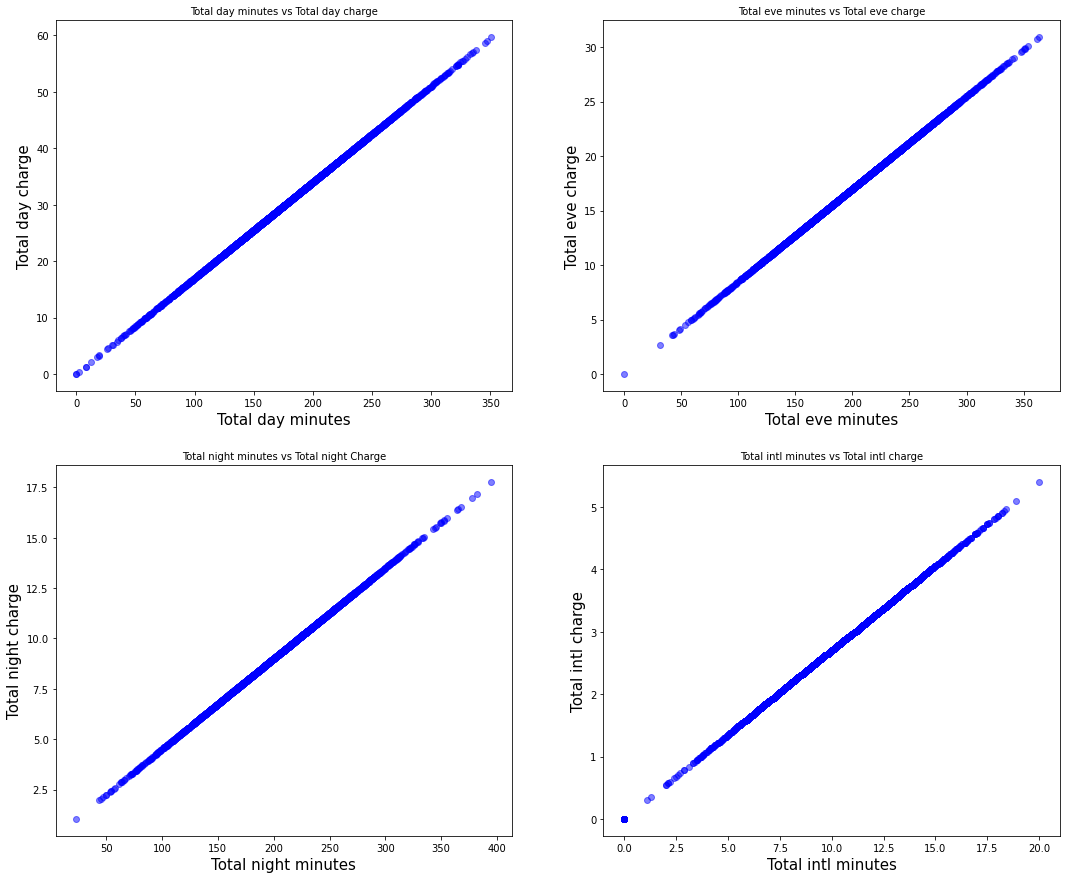

In [0]:

plt.figure(figsize=(18,15))
plt.subplot(2, 2, 1)
plt.scatter(data['Total day minutes'], data['Total day charge'],c='blue', alpha=0.5)
plt.title('Total day minutes vs Total day charge', fontsize = 10)
plt.xlabel('Total day minutes', fontsize = 15)
plt.ylabel('Total day charge', fontsize = 15)


plt.subplot(2, 2, 2)
plt.scatter(data['Total eve minutes'], data['Total eve charge'],c='blue', alpha=0.5)
plt.title('Total eve minutes vs Total eve charge', fontsize = 10)
plt.xlabel('Total eve minutes', fontsize = 15)
plt.ylabel('Total eve charge', fontsize = 15)

plt.subplot(2, 2, 3)
plt.scatter(data['Total night minutes'], data['Total night charge'],c='blue', alpha=0.5)
plt.title('Total night minutes vs Total night Charge', fontsize = 10)
plt.xlabel('Total night minutes', fontsize = 15)
plt.ylabel('Total night charge', fontsize = 15)

plt.subplot(2, 2, 4)
plt.scatter(data['Total intl minutes'], data['Total intl charge'],c='blue', alpha=0.5)
plt.title('Total intl minutes vs Total intl charge', fontsize = 10)
plt.xlabel('Total intl minutes', fontsize = 15)
plt.ylabel('Total intl charge', fontsize = 15)


plt.show()

In [0]:
mean=data['Total day calls'].mean()
mean

100.43564356435644

Above Graph represent linear Relation ship and a positve correlation between then
as 1 increase the other feature also increase (As minutes increase charge ration also increase)

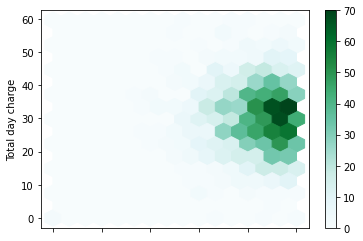

In [0]:

df1=data[data['Total day calls']< data['Total day calls'].mean()]
df1.plot.hexbin(x='Total day calls', y='Total day charge', gridsize=15)

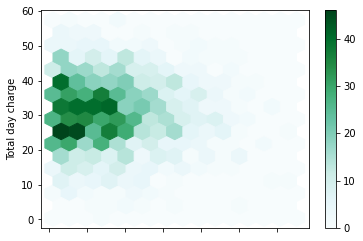

In [0]:

df1=data[data['Total day calls']>data['Total day calls'].mean()]
df1.plot.hexbin(x='Total day calls', y='Total day charge', gridsize=15)

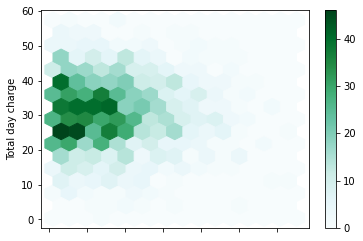

In [0]:

df1=data[data['Total day calls'] >=data['Total day calls'].mean()]
df1.plot.hexbin(x='Total day calls', y='Total day charge', gridsize=15)

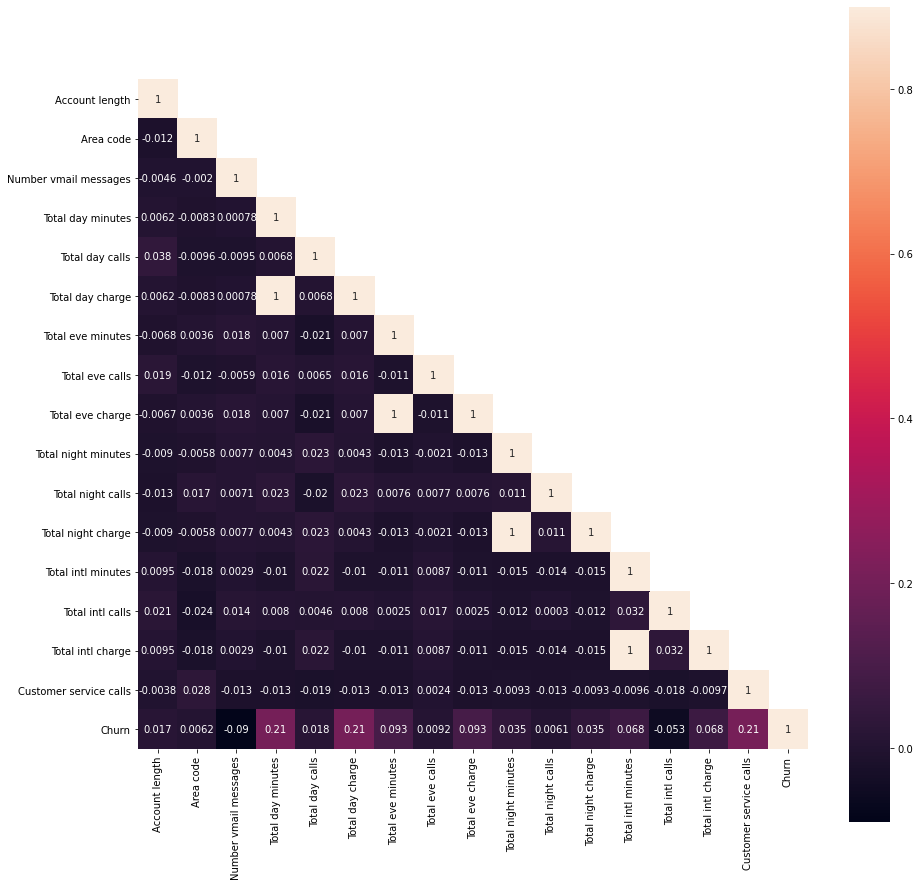

In [0]:
#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

From above matrix we see that charge and minutes of morning evening night and intl are highly
correlated

# OutLier Engineering

In [0]:
Q1 = data[numerical].quantile(0.25)
Q3 = data[numerical].quantile(0.75)
print("Q1\n",Q1,'\n')
print("Q3\n",Q3)

Q1
 Account length            74.00
Number vmail messages      0.00
Total day minutes        143.70
Total day calls           87.00
Total day charge          24.43
Total eve minutes        166.60
Total eve calls           87.00
Total eve charge          14.16
Total night minutes      167.00
Total night calls         87.00
Total night charge         7.52
Total intl minutes         8.50
Total intl calls           3.00
Total intl charge          2.30
Name: 0.25, dtype: float64 

Q3
 Account length           127.00
Number vmail messages     20.00
Total day minutes        216.40
Total day calls          114.00
Total day charge          36.79
Total eve minutes        235.30
Total eve calls          114.00
Total eve charge          20.00
Total night minutes      235.30
Total night calls        113.00
Total night charge        10.59
Total intl minutes        12.10
Total intl calls           6.00
Total intl charge          3.27
Name: 0.75, dtype: float64


In [0]:
IQR=Q3-Q1
IQR

Account length           53.00
Number vmail messages    20.00
Total day minutes        72.70
Total day calls          27.00
Total day charge         12.36
Total eve minutes        68.70
Total eve calls          27.00
Total eve charge          5.84
Total night minutes      68.30
Total night calls        26.00
Total night charge        3.07
Total intl minutes        3.60
Total intl calls          3.00
Total intl charge         0.97
dtype: float64

In [0]:
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
outliers.count()

State                      0
Account length            18
Area code                  0
International plan         0
Voice mail plan            0
Number vmail messages      1
Total day minutes         25
Total day calls           23
Total day charge          25
Total eve minutes         24
Total eve calls           20
Total eve charge          24
Total night minutes       30
Total night calls         22
Total night charge        30
Total intl minutes        46
Total intl calls          78
Total intl charge         49
Customer service calls     0
Churn                      0
dtype: int64

In [0]:
outliers.count().sum()

415

As our data set is very small we have to impute value of mean

In [0]:
def outlierImputing(data,var):
    Q3=data[var].quantile(0.75) #quantile q3
    Q1=data[var].quantile(0.25) #quantile q1
    IQR=Q3-Q1    #Inter Quantile range
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    data[var]=np.where((data[var]<lower),np.mean(data[var]),
    np.where(( data[var]>upper),np.mean(data[var]),data[var]))
    
for num in numerical:    
    outlierImputing(data,num)

## Shape of Data AFter Outlier Handling

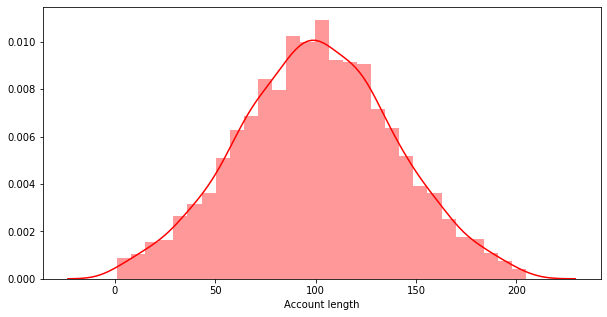

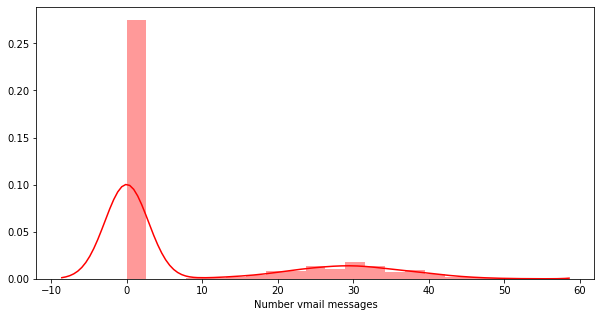

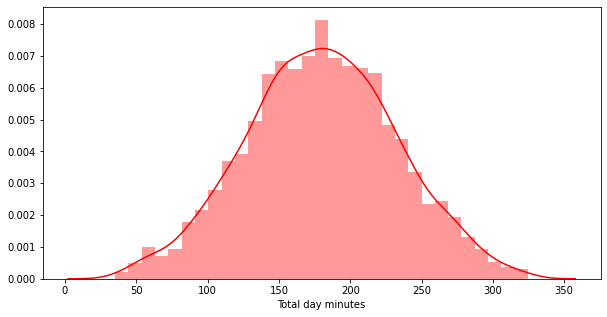

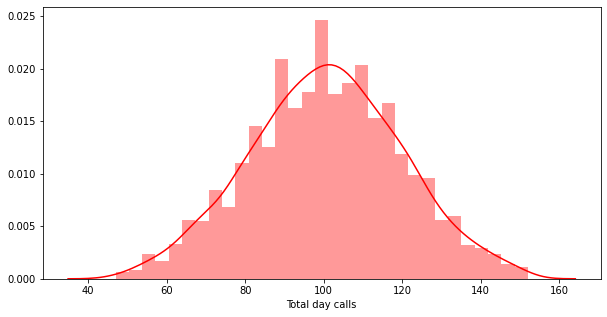

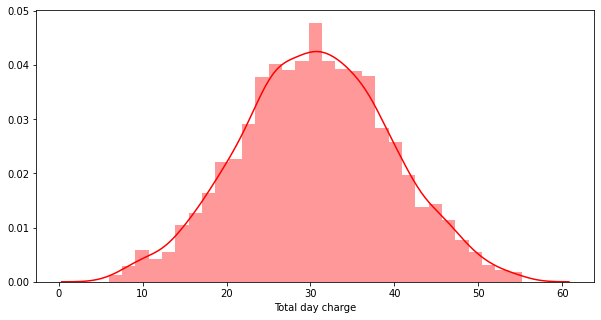

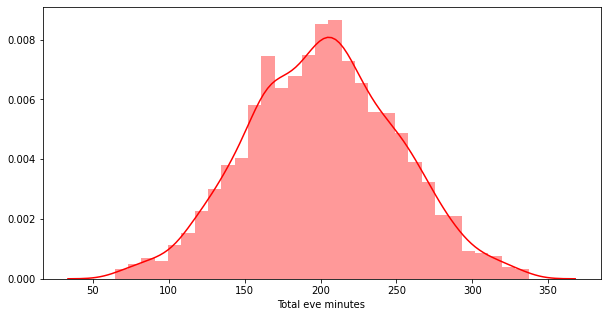

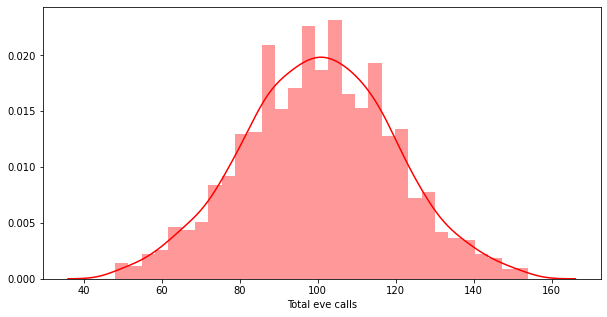

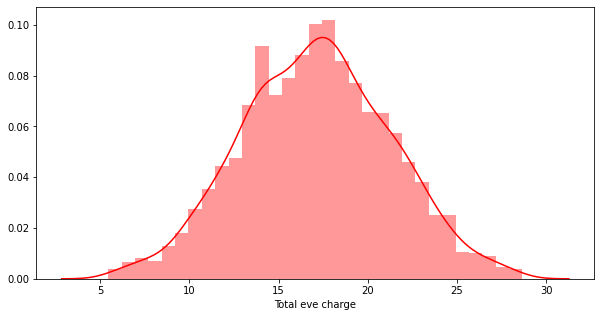

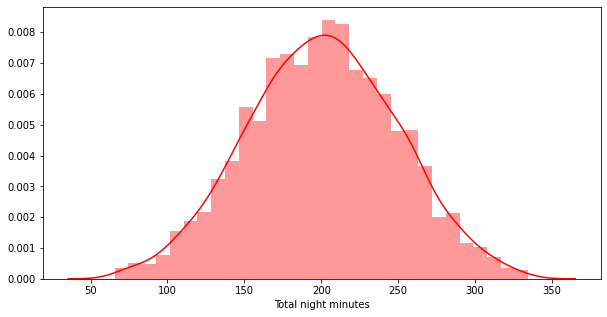

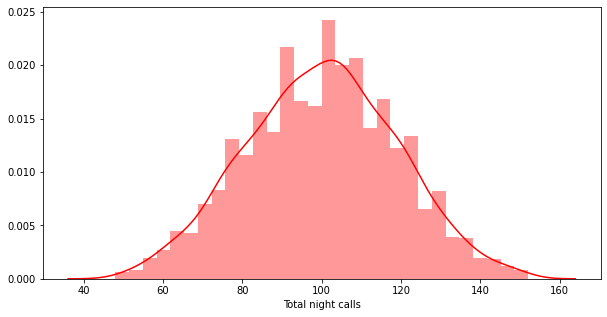

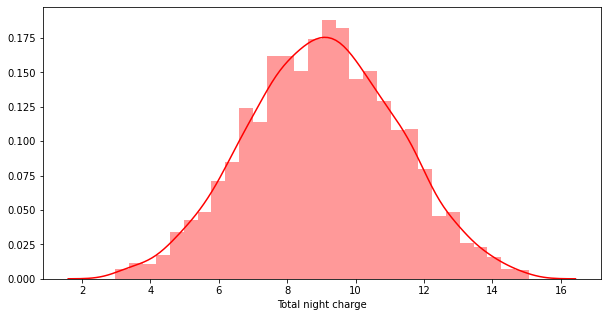

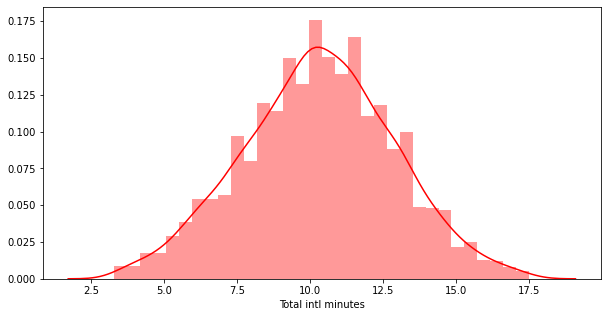

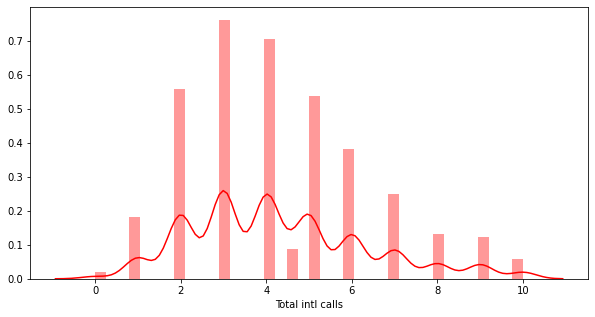

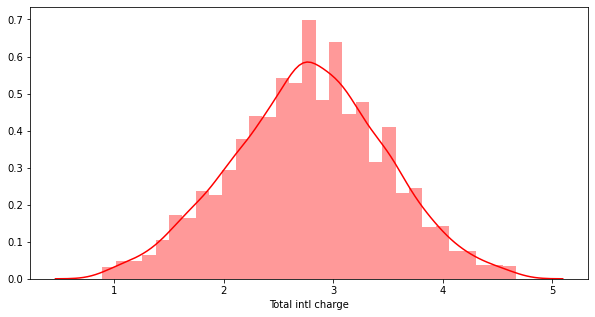

In [0]:
for col in numerical:
  plt.rcParams['figure.figsize'] = (10, 5)
  sns.distplot(data[col], color = 'red')
  plt.show()
  print('\n')

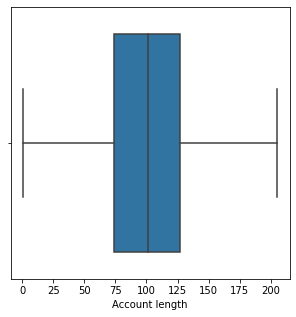

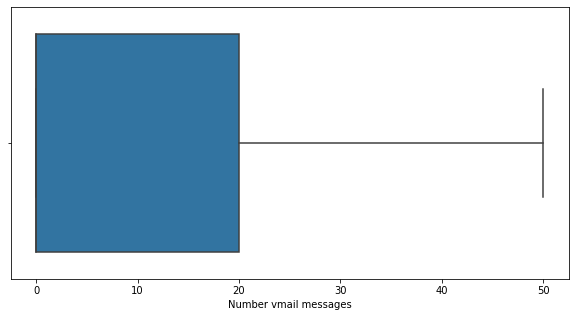

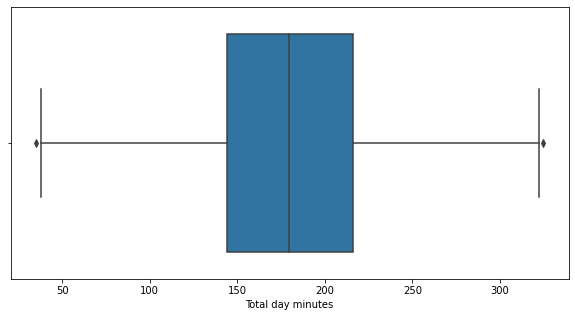

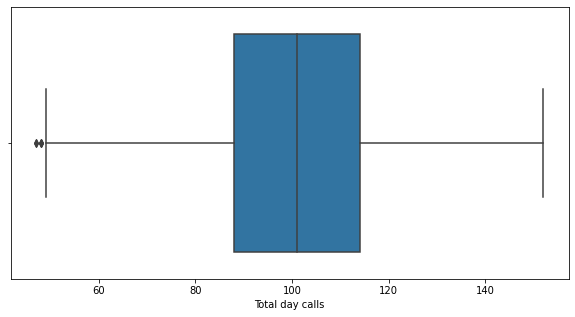

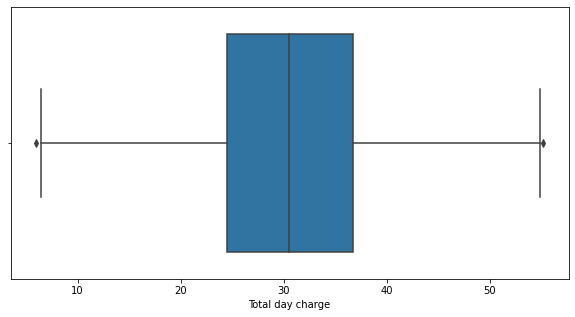

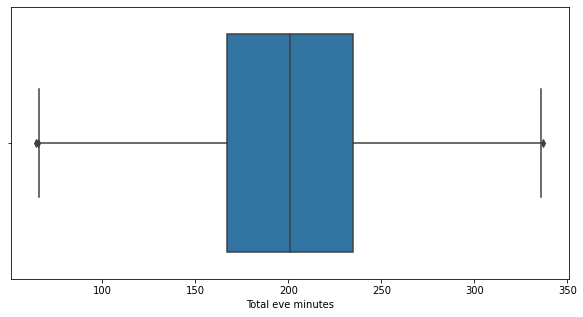

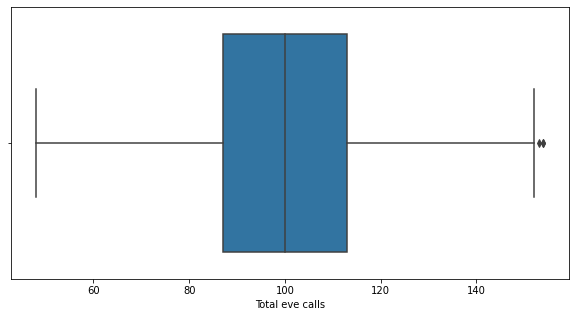

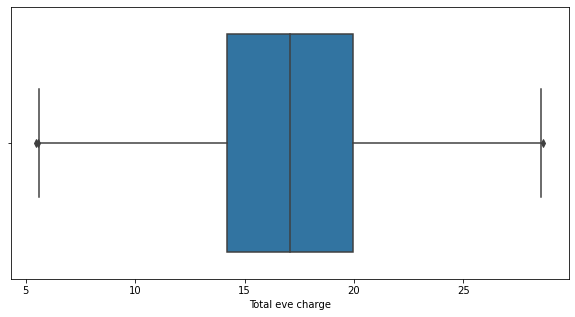

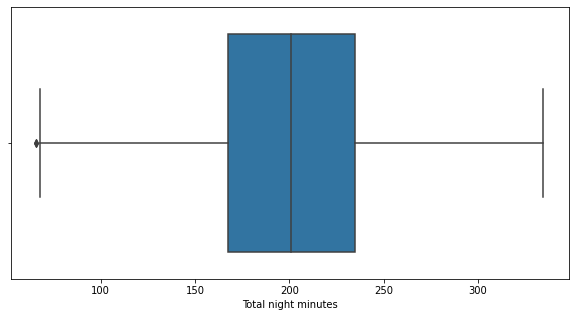

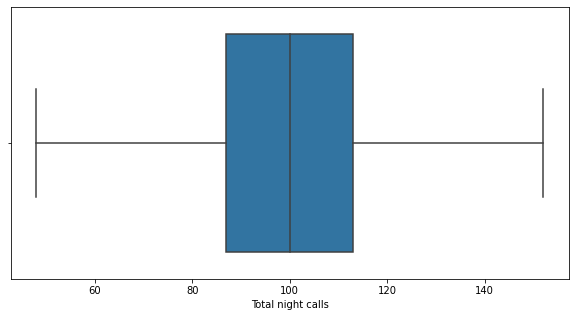

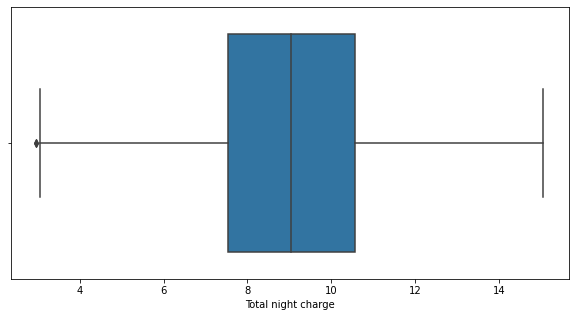

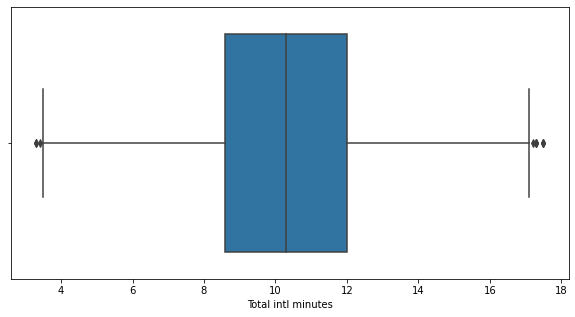

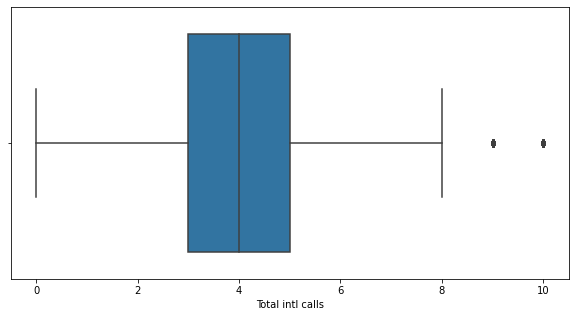

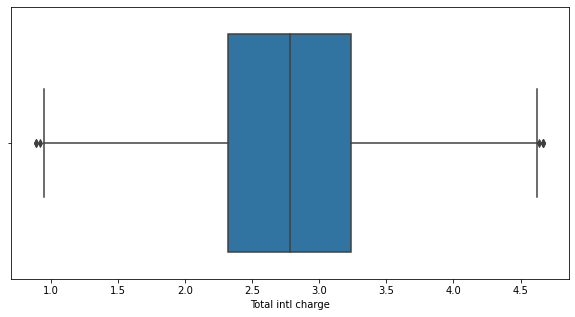

In [0]:
fig = plt.figure(figsize = (5,5))
for num in numerical:
    sns.boxplot(data = data, x = num)
    plt.show()

In [0]:
"""#Without COrrelation features
numerical1 = ["Account length","Number vmail messages","Total day minutes","Total day calls",
            "Total eve minutes","Total eve calls",
            "Total night minutes","Total night calls",
             "Total intl minutes","Total intl calls",
             "Customer service calls"]"""

'#Without COrrelation features\nnumerical1 = ["Account length","Number vmail messages","Total day minutes","Total day calls",\n            "Total eve minutes","Total eve calls",\n            "Total night minutes","Total night calls",\n             "Total intl minutes","Total intl calls",\n             "Customer service calls"]'

## Feature Selection By Wrapper Method

In [0]:
#Label Encoding of Categorical Variable 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['State'] = encoder.fit_transform(data['State'])
data['Area code'] = encoder.fit_transform(data['Area code'])
data['International plan'] = encoder.fit_transform(data['International plan'])
data['Voice mail plan'] = encoder.fit_transform(data['Voice mail plan'])
data['Churn'] = encoder.fit_transform(data['Churn'])

In [0]:
data.head()

State  Account length  ...  Customer service calls  Churn
0     16           128.0  ...                       1      0
1     35           107.0  ...                       1      0
2     31           137.0  ...                       0      0
3     35            84.0  ...                       2      0
4     36            75.0  ...                       3      0

[5 rows x 20 columns]

## DataFrame For CLuster Analysis

In [0]:
#We make new Data frame name as newData this include features and target both we save our original data frame 
newData1=pd.DataFrame()
for col in data.columns:
    newData1[col]=data[col]
#Removing Correlated variable  'Total day charge','Total eve charge','Total night charge','Total intl charge'
#Data Frame withoout Correlated Variable
newData2=data.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1)
print(newData1.head())
print(newData2.head())

   State  Account length  ...  Customer service calls  Churn
0     16           128.0  ...                       1      0
1     35           107.0  ...                       1      0
2     31           137.0  ...                       0      0
3     35            84.0  ...                       2      0
4     36            75.0  ...                       3      0

[5 rows x 20 columns]
   State  Account length  ...  Customer service calls  Churn
0     16           128.0  ...                       1      0
1     35           107.0  ...                       1      0
2     31           137.0  ...                       0      0
3     35            84.0  ...                       2      0
4     36            75.0  ...                       3      0

[5 rows x 16 columns]


## Normalization

In [0]:
#Normalization of data between -1 to 1 using z score normalization 
for num in numerical:
    data[num]=(data[num]-data[num].mean())/data[num].std()
data['State']=(data['State']-data['State'].mean())/data['State'].std()

In [0]:
#We make new Data frame name as newData this include features only
newData3=pd.DataFrame()
for col in data.columns[:-1]:
    newData3[col]=data[col]
newData3.head()

State  Account length  ...  Total intl charge  Customer service calls
0 -0.678547        0.709110  ...          -0.111729                       1
1  0.603079        0.168906  ...           1.325281                       1
2  0.333263        0.940625  ...           0.736107                       0
3  0.603079       -0.422745  ...          -1.433779                       2
4  0.670533       -0.654261  ...          -0.068619                       3

[5 rows x 19 columns]

In [0]:
#Removing Correlated variable  'Total day charge','Total eve charge','Total night charge','Total intl charge'
#Data Frame withoout Correlated Variable
RfData=data.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1)

In [0]:
data.head()

State  Account length  ...  Customer service calls  Churn
0 -0.678547        0.709110  ...                       1      0
1  0.603079        0.168906  ...                       1      0
2  0.333263        0.940625  ...                       0      0
3  0.603079       -0.422745  ...                       2      0
4  0.670533       -0.654261  ...                       3      0

[5 rows x 20 columns]

In [0]:
RfData.head()

State  Account length  ...  Customer service calls  Churn
0 -0.678547        0.709110  ...                       1      0
1  0.603079        0.168906  ...                       1      0
2  0.333263        0.940625  ...                       0      0
3  0.603079       -0.422745  ...                       2      0
4  0.670533       -0.654261  ...                       3      0

[5 rows x 16 columns]

## Preparing x and y input for RandomForest and Extra tree Classifier Algorithm

In [0]:
# We use RFData Frame because we want the frame without correlated variable
X=RfData.drop('Churn',axis=1)
y=RfData['Churn']

## By Random Forest Method

In [0]:
#Random Forest method for feature selctiion
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)    
#thit is how we get the feature importance with simple steps:
# Load classification dataset
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
cols_randfor_imp=[index for index,value in enumerate(importances) if value > 0.0250]
print(cols_randfor_removed)
X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

[0.0403 0.0483 0.0139 0.0799 0.0146 0.0244 0.2269 0.0486 0.0969 0.0476
 0.0617 0.0493 0.074  0.0569 0.1168]
[2, 4, 5]
Index(['State', 'Account length', 'International plan', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls'],
      dtype='object')


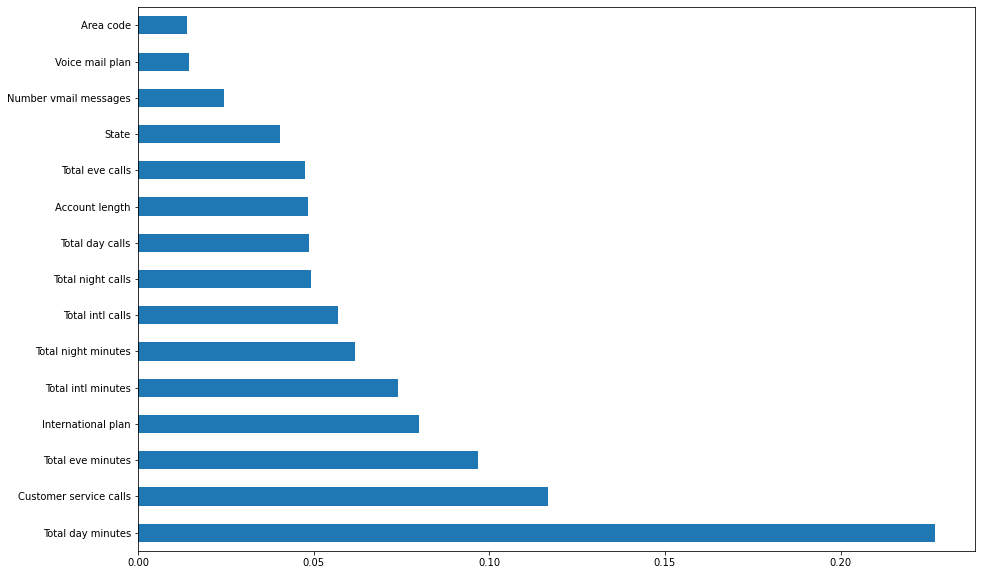

In [0]:
plt.figure(figsize=(15,10))
feat_importances = pd.Series(importances,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## By Extra Trees Classfier

[0.05386364 0.05527459 0.03324414 0.07489007 0.01423873 0.01958266
 0.16753159 0.05873395 0.0794269  0.05710166 0.06123433 0.05801418
 0.07089014 0.07024358 0.12572983]


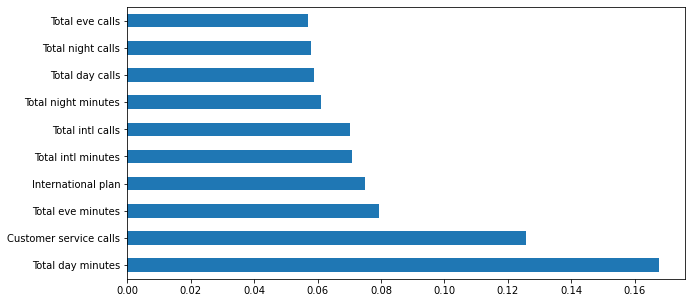

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
DS_2_cluster = X[['Total day minutes','Total eve minutes','Customer service calls']]
cluster_scaled1 = DS_2_cluster

In [0]:
cluster_scaled1.head()

Total day minutes  Total eve minutes  Customer service calls
0           1.616837          -0.076981                       1
1          -0.348316          -0.115731                       1
2           1.204820          -1.631026                       0
3           2.268091          -0.003963                       2
4          -0.251482          -1.078341                       3

## Clustering

## K-Mean

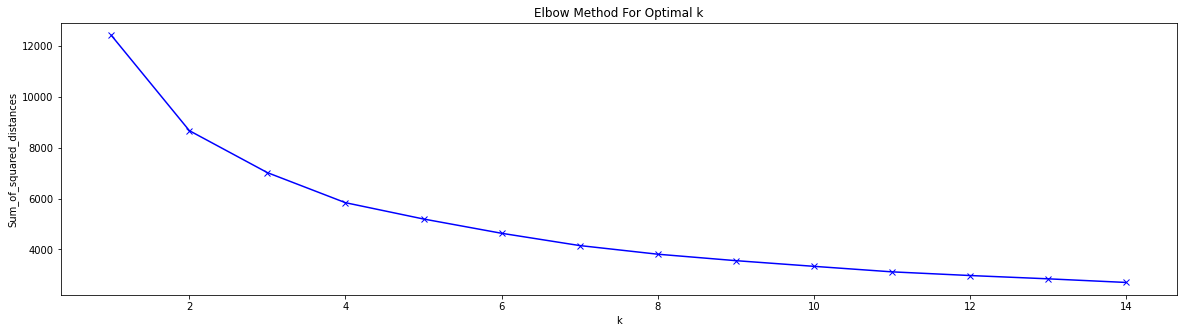

In [0]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled1)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


External Validation
0.008738604811859915
(0.011962979156581798, 0.007225672346156605, 0.009009551052300373)
K-Means
Labels of K Mean [0 1]
DB for K mean:1.386665229377361
Silhoutte Score Kmean:0.28444919988222184
Calinski Score for K mean:1441.9537848106356


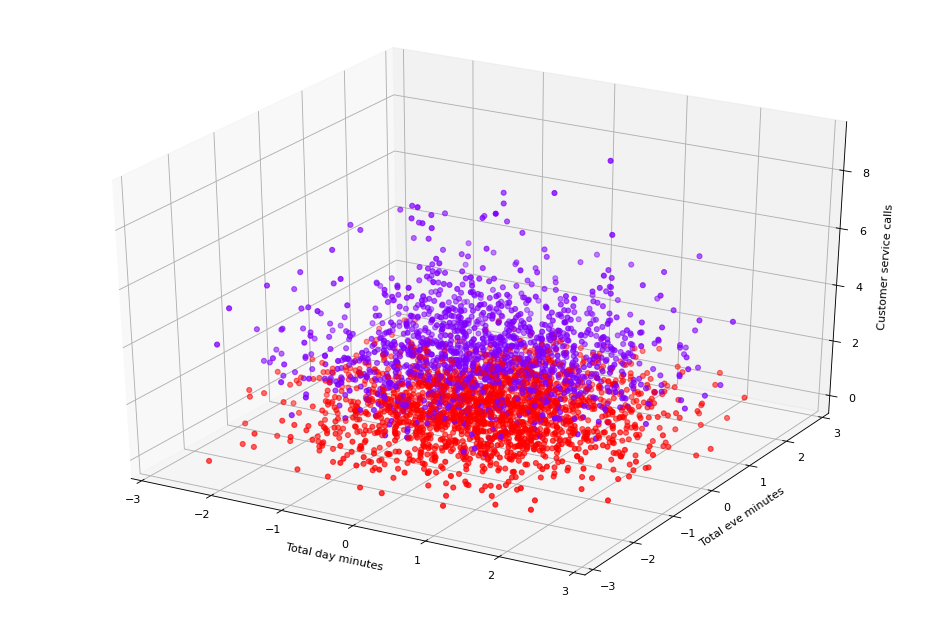

In [0]:
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import calinski_harabasz_score, silhouette_score
model = KMeans(n_clusters=2)
model.fit(cluster_scaled1)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData, kmeans_labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,kmeans_labels))



ax.scatter3D(DS_2_cluster['Total day minutes'],DS_2_cluster['Total eve minutes'],DS_2_cluster['Customer service calls'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Total day minutes', linespacing=3.2)
yLabel = ax.set_ylabel('Total eve minutes', linespacing=3.1)
zLabel = ax.set_zlabel('Customer service calls', linespacing=3.4)
print("K-Means")
print("Labels of K Mean",np.unique(kmeans_labels))
print("DB for K mean:"+str(davies_bouldin_score(cluster_scaled1, kmeans_labels)) )
print("Silhoutte Score Kmean:"+ str(silhouette_score(cluster_scaled1, kmeans_labels))) 
print("Calinski Score for K mean:"+ str(calinski_harabasz_score(cluster_scaled1, kmeans_labels)))

In [0]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).describe().round(1)
grouped_kmeans

Total day minutes                      ... Customer service calls                    
                    count mean  std  min  25%  ...                    min  25%  50%  75%  max
Cluster                                        ...                                           
0                  1455.0 -0.0  1.0 -2.7 -0.7  ...                    2.0  2.0  2.0  3.0  9.0
1                  1878.0  0.0  1.0 -2.8 -0.6  ...                    0.0  0.0  1.0  1.0  1.0

[2 rows x 24 columns]

In [0]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

Total day minutes  Total eve minutes  Customer service calls
Cluster                                                              
0                     -0.0               -0.0                     2.8
1                      0.0                0.0                     0.6

From Above We conclude That 

Cluster 0 represent that those who have minutes in negative and Customer Service in positive they are churner

Cluster 1 represent that Those who have postive day and eve minutes and low customer service calls they are not churner
they are not churner

## Mean Shift 

bandwidth 1.6611591809310964
[0 0 0 ... 0 0 0]
DB for Mean Shift Model:1.1231339277044838
Silhoutte Score for Mean Shift:0.4356424544009825
Calinski Score for Mean Shift:248.59080145812254
External Validation
0.06144801378599518
(0.04159445280427889, 0.12598643683383545, 0.06254098438289205)
Mean shift
number of estimated clusters : 3


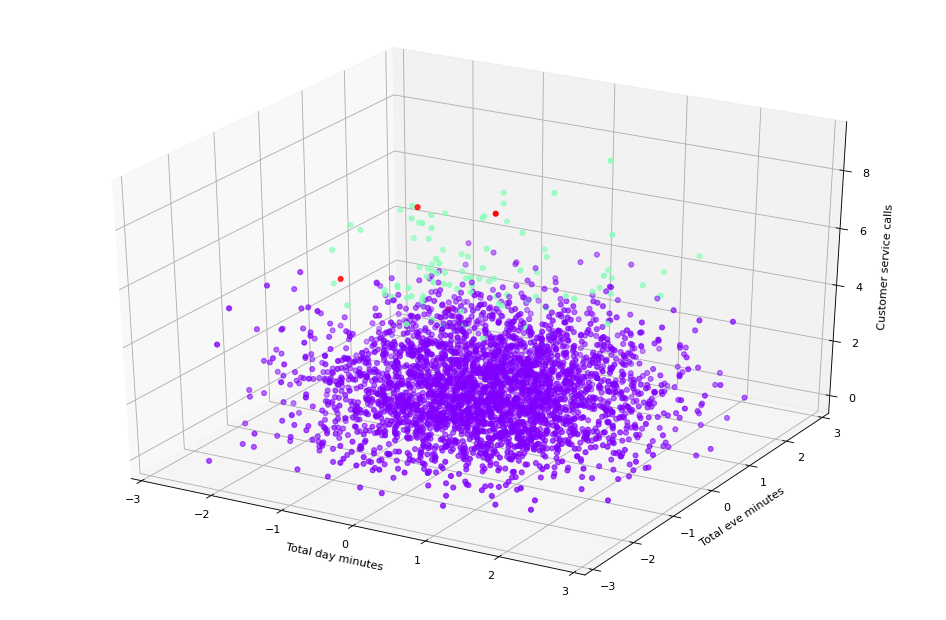

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled1, quantile=0.2)
print("bandwidth",bandwidth)
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled1)
labels = analyzer.labels_
print(labels)
print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled1, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled1, labels))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled1, labels)))


print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,labels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,labels))

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster['Total day minutes'],DS_2_cluster['Total eve minutes'],DS_2_cluster['Customer service calls'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Total day minutes', linespacing=3.2)
yLabel = ax.set_ylabel('Total eve minutes', linespacing=3.1)
zLabel = ax.set_zlabel('Customer service calls', linespacing=3.4)
print("Mean shift")  


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)


In [0]:
DS2_clustered_MS = DS_2_cluster.assign(Cluster=labels)
grouped_MS = DS2_clustered_MS.groupby(['Cluster']).describe().round(1)
grouped_MS

Total day minutes                      ... Customer service calls                    
                    count mean  std  min  25%  ...                    min  25%  50%  75%  max
Cluster                                        ...                                           
0                  3236.0  0.0  1.0 -2.8 -0.7  ...                    0.0  1.0  1.0  2.0  5.0
1                    93.0 -0.1  1.0 -2.1 -0.8  ...                    5.0  5.0  5.0  6.0  9.0
2                     4.0 -0.0  0.9 -1.1 -0.7  ...                    6.0  6.0  7.0  8.2  9.0

[3 rows x 24 columns]

In [0]:
DS2_clustered_MS = DS_2_cluster.assign(Cluster=labels)
grouped_MS = DS2_clustered_MS.groupby(['Cluster']).mean().round(1)
grouped_MS

Total day minutes  Total eve minutes  Customer service calls
Cluster                                                              
0                      0.0                0.0                     1.4
1                     -0.1                0.1                     5.5
2                     -0.0               -1.4                     7.2

Cluster 0 represent positive zero values they are not churner

Cluster 1 represent negative value of day minutes and positive zero of eve minutes and little high customer service calls means they are less churner.

Cluster 2 Represent negative value of day and eve minutes and high customer service call so they are churner.

## Affinity Propagation

DB for Affinity Propagation:0.8053611392334101
Silhoutte Score for Affinity Propagation:0.33414484452904064
Calinski Score forAffinity Propagation:740.758958413762
External Validation
0.04493728722485371
(0.36803251318385444, 0.030200018102535035, 0.05581959125524478)
Affinity Propagation
188
Affinity Propagation


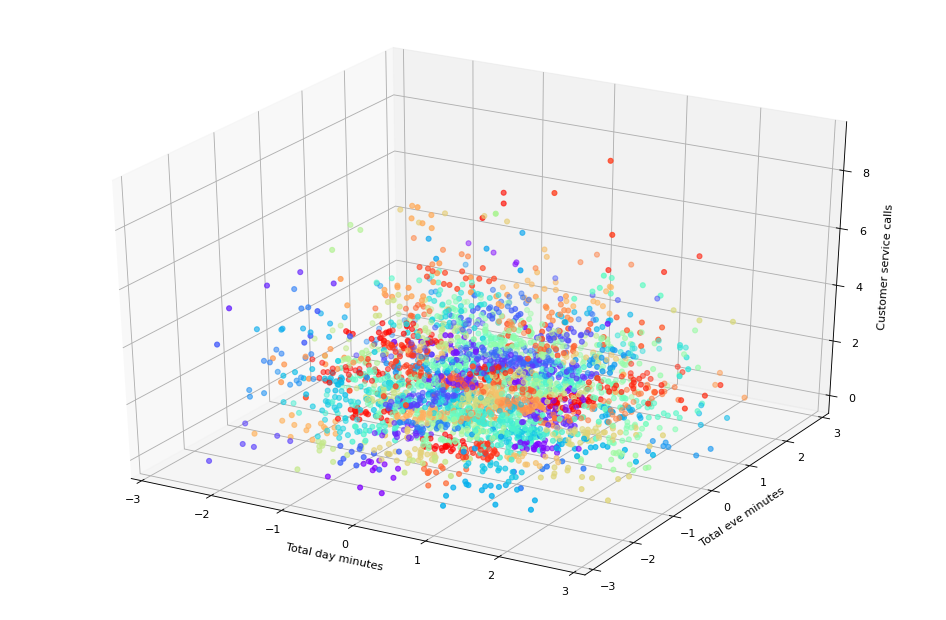

In [0]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference = euclidean_distances(cluster_scaled1,cluster_scaled1).max()
af = AffinityPropagation(preference=-2)
clustering=af.fit(cluster_scaled1)
af.get_params()
AFlabels = af.predict(cluster_scaled1)



print("DB for Affinity Propagation:"+str(davies_bouldin_score(cluster_scaled1, AFlabels)) )
print("Silhoutte Score for Affinity Propagation:"+ str(silhouette_score(cluster_scaled1, AFlabels))) 
print("Calinski Score forAffinity Propagation:"+ str(calinski_harabasz_score(cluster_scaled1, AFlabels)))
print("External Validation")
label_givenInData = y
print(adjusted_mutual_info_score(label_givenInData,AFlabels))
print(metrics.homogeneity_completeness_v_measure(label_givenInData,AFlabels))




fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(DS_2_cluster['Total day minutes'],DS_2_cluster['Total eve minutes'],DS_2_cluster['Customer service calls'],c=AFlabels, cmap='rainbow')

xLabel = ax.set_xlabel('Total day minutes', linespacing=3.2)
yLabel = ax.set_ylabel('Total eve minutes', linespacing=3.1)
zLabel = ax.set_zlabel('Customer service calls', linespacing=3.4)
print("Affinity Propagation")  


labels_unique = np.unique(AFlabels)
n_clusters_ = len(labels_unique)
print(n_clusters_)
print("Affinity Propagation") 

In [0]:
DS2_clustered_AF = DS_2_cluster.assign(Cluster=AFlabels)
grouped_AF = DS2_clustered_AF.groupby(['Cluster']).mean().round(1)
grouped_AF.head()

Total day minutes  Total eve minutes  Customer service calls
Cluster                                                              
0                     -0.4               -2.0                     0.0
1                     -1.0                2.1                     4.0
2                      0.9               -0.3                     0.0
3                      1.3               -1.1                     3.0
4                      0.4                1.2                     0.0

 You Have to apply your clustering algorithm here 

# Questions  and Answer 

## Which variables are highly correlated with customer churn? 

According to the Multicolinearity The higly correlated feature t churn are following
1) Total Charge

2) Total Minutes

3) Total Calls

According to Feature Selection Method
1) Total Charge

2) Customers Serice Call

3) Total Minutes




## State the mean median mode and standard deviation for the different clusters

## K Mean

In [0]:
DS2_clustered_kmeans = DS_2_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).describe().round(1)
grouped_kmeans

Total day minutes                      ... Customer service calls                    
                    count mean  std  min  25%  ...                    min  25%  50%  75%  max
Cluster                                        ...                                           
0                  1455.0 -0.0  1.0 -2.7 -0.7  ...                    2.0  2.0  2.0  3.0  9.0
1                  1878.0  0.0  1.0 -2.8 -0.6  ...                    0.0  0.0  1.0  1.0  1.0

[2 rows x 24 columns]

## Mean Shift

In [0]:
DS2_clustered_MS = DS_2_cluster.assign(Cluster=labels)
grouped_MS = DS2_clustered_MS.groupby(['Cluster']).describe().round(1)
grouped_MS

Total day minutes                      ... Customer service calls                    
                    count mean  std  min  25%  ...                    min  25%  50%  75%  max
Cluster                                        ...                                           
0                  3236.0  0.0  1.0 -2.8 -0.7  ...                    0.0  1.0  1.0  2.0  5.0
1                    93.0 -0.1  1.0 -2.1 -0.8  ...                    5.0  5.0  5.0  6.0  9.0
2                     4.0 -0.0  0.9 -1.1 -0.7  ...                    6.0  6.0  7.0  8.2  9.0

[3 rows x 24 columns]

## Affinity Propagation

In [0]:
DS2_clustered_AF = DS_2_cluster.assign(Cluster=AFlabels)
grouped_AF = DS2_clustered_AF.groupby(['Cluster']).describe().round(1)
grouped_AF.head()

Total day minutes                      ... Customer service calls                    
                    count mean  std  min  25%  ...                    min  25%  50%  75%  max
Cluster                                        ...                                           
0                    12.0 -0.4  0.3 -0.8 -0.6  ...                    0.0  0.0  0.0  0.0  0.0
1                     4.0 -1.0  0.4 -1.6 -1.2  ...                    4.0  4.0  4.0  4.0  4.0
2                    28.0  0.9  0.2  0.6  0.7  ...                    0.0  0.0  0.0  0.0  0.0
3                    16.0  1.3  0.3  0.9  1.0  ...                    3.0  3.0  3.0  3.0  3.0
4                    27.0  0.4  0.2  0.1  0.2  ...                    0.0  0.0  0.0  0.0  0.0

[5 rows x 24 columns]

## Describe your analysis of different clusters

### K Mean

External Validation 0.008738604811859915

K-Means

Cluster = 2

DB for K mean:1.386665229377361

Silhoutte Score Kmean:0.28444919988222184

Calinski Score for K mean:1441.9537848106356

## Mean Shift 

DB for Affinity Propagation:0.8053611392334101

Silhoutte Score for Affinity Propagation:0.33414484452904064

Calinski Score forAffinity Propagation:740.758958413762

External Validation 0.04493728722485371

Affinity Propagation:188

## Affinity Propagation 

No Of Clusters : 131
    
DB for Affinity Propagation:0.8123945597971595
    
Silhoutte Score for Affinity Propagation:0.2764762307854357
    
Calinski Score for Affinity Propagation:884.6184204729858
    
External Validation 0.02794700813598992

# What features are highly impacting different clusters?

In K Mean and mean shift  Customer Service call feature lie in both cluster of feature Total_charges and Total Minutes

# Supervised Learning

### **Data Frame of best Feature Selected using Random Forest**

In [0]:
newData1=newData1[['State', 'Account length', 'International plan', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls','Churn']]

In [0]:
newData1.head() 

State  Account length  ...  Customer service calls  Churn
0     16           128.0  ...                       1      0
1     35           107.0  ...                       1      0
2     31           137.0  ...                       0      0
3     35            84.0  ...                       2      0
4     36            75.0  ...                       3      0

[5 rows x 13 columns]

### **Data Frame of best Feature selected using Extra Tree Classifier**

In [0]:
newData2=newData1[['Total day minutes','Customer service calls','Total eve minutes','International plan','Total intl minutes',
                   'Total intl calls','Total night minutes','Total day calls','Total night calls','Account length','Churn']]
newData2.head()

Total day minutes  Customer service calls  ...  Account length  Churn
0              265.1                       1  ...           128.0      0
1              161.6                       1  ...           107.0      0
2              243.4                       0  ...           137.0      0
3              299.4                       2  ...            84.0      0
4              166.7                       3  ...            75.0      0

[5 rows x 11 columns]

# Instruction 

1) You have to do train test Split of 80/20 use stratify option

2) Do Normalization using standardScaler fit on train data first then transform on test data donot fit whole data avoid data leakage 

3) Apply Simple ALgorithm 


4) Second Apply with Cross validation technique 

5) Third Do Hyper paramter tuning using grid search and randomized Seach CV 

6) Fourth AFter tuning apply Algorithm again with tune parameter and also do cross validation

7) Do Same thing for both data Frame first with newData1 and then with newData2

8) Please used random state in each algorithm 

9) Find both training and test accuracy judge the results that your algo is overfiitng or underfiitng

10) Find Precison ,Recall by classfication report also draw roc curve,find its value

## Train Test Split Of NewData1 with All features

In [0]:
x=np.array(newData1.drop(["Churn"],axis=1))
y=np.array(newData1["Churn"])


# **Balancing Data Using Smote**

In [0]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter = Counter(y)
print("Data before Smote")
print(counter)
over = SMOTE(sampling_strategy= 0.4,random_state=42)
under = RandomUnderSampler(sampling_strategy= 0.5,random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
sx, sy = pipeline.fit_resample(x, y)
# summarize the new class distribution
print("Data After Smote")
counter = Counter(sy)
print(counter)

Data before Smote
Counter({0: 2850, 1: 483})
Data After Smote
Counter({0: 2280, 1: 1140})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [0]:
sx_train,sx_test,sy_train,sy_test = train_test_split(sx,sy,stratify=sy,test_size=0.2,random_state=42)
print(sx_train.shape,sy_train.shape)
print(sx_test.shape,sy_test.shape)

(2736, 12) (2736,)
(684, 12) (684,)


### Normalization 

In [0]:
scaler=StandardScaler()                   
sx_train=scaler.fit_transform(sx_train)  #Normalizing of balance data set after appling smote 
sx_test=scaler.transform(sx_test)

# **Algorithms After Applying SMOTE Imbalanced Technique**

## **Naive Bayes**

In [0]:
#Naive Bayes
print("Naive Bayes")
NB=GaussianNB()
NB.fit(sx_train,sy_train)
prediction = NB.predict(sx_test)
train_accuracy=(accuracy_score(NB.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)

#prediction=prediction.reshape(855,1)
print('Training accuracy {%} :\n ', train_accuracy)
print("Test accuracy {%} : \n",test_accuracy)
print("Precision of Naive Bayes (%): \n", precision)
print("Recall of Naive Bayes (%): \n", recall)
Nfpr1 , Ntpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Naive Bayes (%): \n",auc(Nfpr1 , Ntpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Naive Bayes
Training accuracy {%} :
  77.49
Test accuracy {%} : 
 78.51
Precision of Naive Bayes (%): 
 76.82
Recall of Naive Bayes (%): 
 50.88
AUC of Naive Bayes (%): 
 0.7160087719298246
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       456
           1       0.77      0.51      0.61       228

    accuracy                           0.79       684
   macro avg       0.78      0.72      0.73       684
weighted avg       0.78      0.79      0.77       684

Miss Classification  147
[[421  35]
 [112 116]]


# **Logistic Regression**

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")
LR=LogisticRegression(random_state=42)
LR.fit(sx_train,sy_train)
prediction = LR.predict(sx_test)
train_accuracy=(accuracy_score(LR.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)
print(len(prediction))
print(len(sy_test))


print('Training acc {%} :\n ',train_accuracy)
print("Accuracy of Logistic Regression (%): \n",test_accuracy)
print("Precision of Logistic Regression (%): \n",precision)
print("Recall of Logistic Regression (%): \n",recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Logistic Regression (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Logistic Regression
684
684
Training acc {%} :
  76.28
Accuracy of Logistic Regression (%): 
 76.02
Precision of Logistic Regression (%): 
 71.05
Recall of Logistic Regression (%): 
 47.37
AUC of Logistic Regression (%): 
 0.6885964912280701
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       456
           1       0.71      0.47      0.57       228

    accuracy                           0.76       684
   macro avg       0.74      0.69      0.70       684
weighted avg       0.75      0.76      0.75       684

Miss Classification  164
[[412  44]
 [120 108]]


# **Tuning Logistic Regression**

In [0]:
#Hyper Parameters Set of logistic regression
from sklearn.model_selection import RandomizedSearchCV
params =  {"C":[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1],
           "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
           "max_iter":[20,30,40,50,60,70,80,90,100] }
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(LR, param_distributions=params,random_state=42)
model1.fit(sx_train,sy_train)
predictions = model1.predict(sx_test)
#print("Accuracy of LR (%): \n", accuracy_score(x_test, predictions)*100)
#fpr2 , tpr2, _ = roc_curve(x_test, predictions)
#print("AUC of LR (%): \n",auc(fpr1, tpr1)*100)
print(model1.best_params_)

{'solver': 'saga', 'max_iter': 20, 'C': 0.03}


# **Tunned Logistic Regression** 

In [0]:
print("Logistic Regression")
LR=LogisticRegression(C=0.03,max_iter=20,solver='saga',random_state=42)
LR.fit(sx_train,sy_train)
prediction = LR.predict(sx_test)
train_accuracy=(accuracy_score(LR.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)
print(len(prediction))
print(len(sy_test))


print('Training acc {%} :\n ',train_accuracy)
print("Accuracy of Logistic Regression (%): \n",test_accuracy)
print("Precision of Logistic Regression (%): \n",precision)
print("Recall of Logistic Regression (%): \n",recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Logistic Regression (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Logistic Regression
684
684
Training acc {%} :
  75.62
Accuracy of Logistic Regression (%): 
 76.75
Precision of Logistic Regression (%): 
 73.47
Recall of Logistic Regression (%): 
 47.37
AUC of Logistic Regression (%): 
 0.694078947368421
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       456
           1       0.73      0.47      0.58       228

    accuracy                           0.77       684
   macro avg       0.76      0.69      0.71       684
weighted avg       0.76      0.77      0.75       684

Miss Classification  159
[[417  39]
 [120 108]]


In [0]:
#Support Vector Machine 
print("Support Vector Machine")
svc=SVC(random_state=42)
svc.fit(sx_train,sy_train)
prediction = svc.predict(sx_test)
train_accuracy=(accuracy_score(svc.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of SVC (%): \n",test_accuracy)
print('error of SVC (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of SVC (%): \n", precision)
print("Recall of SVC (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of SVC (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Support Vector Machine
Training acc {%} :
  92.47
Accuracy of SVC (%): 
 88.3
error of SVC (%) 0.11695906432748537
Precision of SVC (%): 
 87.0
Recall of SVC (%): 
 76.32
AUC of SVC (%): 
 0.8530701754385965
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       456
           1       0.87      0.76      0.81       228

    accuracy                           0.88       684
   macro avg       0.88      0.85      0.86       684
weighted avg       0.88      0.88      0.88       684

Miss Classification  80
[[430  26]
 [ 54 174]]


## **Tunning of SVC**

In [0]:
#Hyper Parameters Set of SVC
from sklearn.model_selection import RandomizedSearchCV
params =  {"C":[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']  } 
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(svc, param_distributions=params,random_state=42)
model1.fit(sx_train,sy_train)
predictions = model1.predict(sx_test)
#print("Accuracy of LR (%): \n", accuracy_score(sx_test, predictions)*100)
#fpr2 , tpr2, _ = roc_curve(sx_test, predictions)
#print("AUC of LR (%): \n",auc(fpr1, tpr1)*100)
print(model1.best_params_)

{'kernel': 'linear', 'gamma': 0.0001, 'C': 0.01}


# **Tunned Support Vector Machine**

In [0]:
#Support Vector Machine 
print("Support Vector Machine")
svc=SVC(C=0.01,gamma=0.0001,kernel='linear',random_state=42)
svc.fit(sx_train,sy_train)
prediction = svc.predict(sx_test)
train_accuracy=(accuracy_score(svc.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of SVC (%): \n",test_accuracy)
print('error of SVC (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of SVC (%): \n", precision)
print("Recall of SVC (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of SVC (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Support Vector Machine
Training acc {%} :
  73.46
Accuracy of SVC (%): 
 73.25
error of SVC (%) 0.26754385964912286
Precision of SVC (%): 
 72.28
Recall of SVC (%): 
 32.02
AUC of SVC (%): 
 0.6293859649122807
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       456
           1       0.72      0.32      0.44       228

    accuracy                           0.73       684
   macro avg       0.73      0.63      0.63       684
weighted avg       0.73      0.73      0.70       684

Miss Classification  183
[[428  28]
 [155  73]]


## **Decision Tree**

In [0]:

print("Decision Tree")
ds=DecisionTreeClassifier(random_state=42)
ds.fit(sx_train,sy_train)
prediction = ds.predict(sx_test)
train_accuracy=(accuracy_score(ds.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of SVC (%): \n",test_accuracy)
print('error of Decision Tree (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of Decision Tree (%): \n", precision)
print("Recall of Decision Tree (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Decision Tree (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Decision Tree
Training acc {%} :
  100.0
Accuracy of SVC (%): 
 89.33
error of Decision Tree (%) 0.10672514619883045
Precision of Decision Tree (%): 
 82.7
Recall of Decision Tree (%): 
 85.96
AUC of Decision Tree (%): 
 0.8848684210526316
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       456
           1       0.83      0.86      0.84       228

    accuracy                           0.89       684
   macro avg       0.88      0.88      0.88       684
weighted avg       0.89      0.89      0.89       684

Miss Classification  73
[[415  41]
 [ 32 196]]


## **Tunning OF Decision Tree**

In [0]:
#Hyper Parameters Set of Decision Tree
from sklearn.model_selection import RandomizedSearchCV
params =  {'min_samples_split' : range(5, 100, 5), 'max_depth' : range(1, 20, 1)} 
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(ds, param_distributions=params,random_state=42)
model1.fit(sx_train,sy_train)
predictions = model1.predict(sx_test)
#print("Accuracy of LR (%): \n", accuracy_score(x_test, predictions)*100)
#fpr2 , tpr2, _ = roc_curve(x_test, predictions)
#print("AUC of LR (%): \n",auc(fpr1, tpr1)*100)
print(model1.best_params_)

{'min_samples_split': 30, 'max_depth': 7}


### **Tunned Decision Tree**

In [0]:

print("Decision Tree")
ds=DecisionTreeClassifier(max_depth=7,min_samples_split=30,random_state=42)
ds.fit(sx_train,sy_train)
prediction = ds.predict(sx_test)
train_accuracy=(accuracy_score(ds.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of SVC (%): \n",test_accuracy)
print('error of Decision Tree (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of Decision Tree (%): \n", precision)
print("Recall of Decision Tree (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Decision Tree (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Decision Tree
Training acc {%} :
  92.14
Accuracy of SVC (%): 
 89.77
error of Decision Tree (%) 0.10233918128654973
Precision of Decision Tree (%): 
 87.98
Recall of Decision Tree (%): 
 80.26
AUC of Decision Tree (%): 
 0.8739035087719299
              precision    recall  f1-score   support

           0       0.91      0.95      0.92       456
           1       0.88      0.80      0.84       228

    accuracy                           0.90       684
   macro avg       0.89      0.87      0.88       684
weighted avg       0.90      0.90      0.90       684

Miss Classification  70
[[431  25]
 [ 45 183]]


## **Random Forest**

In [0]:

print("Random Forest")
rf=RandomForestClassifier(random_state=42)
rf.fit(sx_train,sy_train)
prediction = rf.predict(sx_test)
train_accuracy=(accuracy_score(rf.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of RF (%): \n",test_accuracy)
print('error of RF (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of RF (%): \n", precision)
print("Recall of RF (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of RF (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Random Forest
Training acc {%} :
  100.0
Accuracy of RF (%): 
 92.98
error of RF (%) 0.07017543859649122
Precision of RF (%): 
 92.45
Recall of RF (%): 
 85.96
AUC of RF (%): 
 0.9122807017543859
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       456
           1       0.92      0.86      0.89       228

    accuracy                           0.93       684
   macro avg       0.93      0.91      0.92       684
weighted avg       0.93      0.93      0.93       684

Miss Classification  48
[[440  16]
 [ 32 196]]


## **Tunning of Random Forest**

In [0]:
#Hyper Parameters Set of RandomForest
from sklearn.model_selection import RandomizedSearchCV
params =  {'min_samples_split' : range(5, 100, 5), 'max_depth' : range(1, 20, 1)} 
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(rf, param_distributions=params,cv=5,random_state=42)
model1.fit(sx_train,sy_train)
predictions = model1.predict(sx_test)
#print("Accuracy of LR (%): \n", accuracy_score(x_test, predictions)*100)
#fpr2 , tpr2, _ = roc_curve(x_test, predictions)
#print("AUC of LR (%): \n",auc(fpr1, tpr1)*100)
print(model1.best_params_)

{'min_samples_split': 10, 'max_depth': 15}


## **Tunned Random Forest**

In [0]:

print("Random Forest")
rf=RandomForestClassifier(max_depth=15,min_samples_split=10,random_state=42)
rf.fit(sx_train,sy_train)
prediction = rf.predict(sx_test)
train_accuracy=(accuracy_score(rf.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of RF (%): \n",test_accuracy)
print('error of RF (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of RF (%): \n", precision)
print("Recall of RF (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of RF (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Random Forest
Training acc {%} :
  97.15
Accuracy of RF (%): 
 92.25
error of RF (%) 0.07748538011695905
Precision of RF (%): 
 92.27
Recall of RF (%): 
 83.77
AUC of RF (%): 
 0.9013157894736843
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       456
           1       0.92      0.84      0.88       228

    accuracy                           0.92       684
   macro avg       0.92      0.90      0.91       684
weighted avg       0.92      0.92      0.92       684

Miss Classification  53
[[440  16]
 [ 37 191]]


## **Gradient Boosting**

In [0]:
print("Gradient boost")
GBoost = GradientBoostingClassifier(random_state=42)
GBoost.fit(sx_train,sy_train)
prediction = GBoost.predict(sx_test)
train_accuracy=(accuracy_score(GBoost.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of Gradient boost  (%): \n",test_accuracy)
print('error of Gradient boost (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of Gradient boost (%): \n", precision)
print("Recall of Gradient boost (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Gradient boost (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Gradient boost
Training acc {%} :
  94.19
Accuracy of Gradient boost  (%): 
 91.67
error of Gradient boost (%) 0.08333333333333337
Precision of Gradient boost (%): 
 92.54
Recall of Gradient boost (%): 
 81.58
AUC of Gradient boost (%): 
 0.8914473684210527
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       456
           1       0.93      0.82      0.87       228

    accuracy                           0.92       684
   macro avg       0.92      0.89      0.90       684
weighted avg       0.92      0.92      0.92       684

Miss Classification  57
[[441  15]
 [ 42 186]]


# **Adaboost With Descision Tree**

In [0]:

print("AdaBoost Classifier")
AdaBoost = AdaBoostClassifier(base_estimator=ds, n_estimators=10,learning_rate = 1)
AdaBoost.fit(sx_train,sy_train)
prediction = AdaBoost.predict(sx_test)
train_accuracy=(accuracy_score(AdaBoost.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of Adaboost  (%): \n",test_accuracy)
print('error of Adaboost (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of Adaboost (%): \n", precision)
print("Recall of Adaboost (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Adaboost (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

AdaBoost Classifier
Training acc {%} :
  100.0
Accuracy of Adaboost  (%): 
 88.16
error of Adaboost (%) 0.11842105263157898
Precision of Adaboost (%): 
 83.87
Recall of Adaboost (%): 
 79.82
AUC of Adaboost (%): 
 0.8607456140350878
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       456
           1       0.84      0.80      0.82       228

    accuracy                           0.88       684
   macro avg       0.87      0.86      0.87       684
weighted avg       0.88      0.88      0.88       684

Miss Classification  81
[[421  35]
 [ 46 182]]


## **Tunning OF Adaboost**

In [0]:
print('Tunning OF AdaBoost')
params =  {'n_estimators' : range(5, 100, 5), 'learning_rate' :[0.2,0.4,0.6,0.8,1]} 
AdaBoost = AdaBoostClassifier(base_estimator=ds,random_state=42)
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(AdaBoost, param_distributions=params,cv=5,random_state=42)
model1.fit(sx_train,sy_train)
predictions = model1.predict(sx_test)
#print("Accuracy of LR (%): \n", accuracy_score(x_test, predictions)*100)
#fpr2 , tpr2, _ = roc_curve(x_test, predictions)
#print("AUC of LR (%): \n",auc(fpr1, tpr1)*100)
print(model1.best_params_)

Tunning OF AdaBoost
{'n_estimators': 55, 'learning_rate': 0.2}


## **Adaboost Tunned Model**

In [0]:

print("AdaBoost Classifier")
AdaBoost = AdaBoostClassifier(base_estimator=ds, n_estimators=55,learning_rate = 0.2)
AdaBoost.fit(sx_train,sy_train)
prediction = AdaBoost.predict(sx_test)
train_accuracy=(accuracy_score(AdaBoost.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of Adaboost  (%): \n",test_accuracy)
print('error of Adaboost (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of Adaboost (%): \n", precision)
print("Recall of Adaboost (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of Adaboost (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

AdaBoost Classifier
Training acc {%} :
  100.0
Accuracy of Adaboost  (%): 
 91.81
error of Adaboost (%) 0.08187134502923976
Precision of Adaboost (%): 
 91.75
Recall of Adaboost (%): 
 82.89
AUC of Adaboost (%): 
 0.8958333333333334
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       456
           1       0.92      0.83      0.87       228

    accuracy                           0.92       684
   macro avg       0.92      0.90      0.91       684
weighted avg       0.92      0.92      0.92       684

Miss Classification  56
[[439  17]
 [ 39 189]]


## **XG Boost**

In [0]:
print("XG boost")
import xgboost as xgb
XB=xgb.XGBClassifier(random_state=42)
XB.fit(sx_train,sy_train)
prediction = XB.predict(sx_test)
train_accuracy=(accuracy_score(XB.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of XG boost  (%): \n",test_accuracy)
print('error of XG boost (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of XG boost (%): \n", precision)
print("Recall of XG boost (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of XG boost (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

XG boost
Training acc {%} :
  93.57
Accuracy of XG boost  (%): 
 91.67
error of XG boost (%) 0.08333333333333337
Precision of XG boost (%): 
 91.71
Recall of XG boost (%): 
 82.46
AUC of XG boost (%): 
 0.8936403508771931
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       456
           1       0.92      0.82      0.87       228

    accuracy                           0.92       684
   macro avg       0.92      0.89      0.90       684
weighted avg       0.92      0.92      0.92       684

Miss Classification  57
[[439  17]
 [ 40 188]]


## Neural Network

In [0]:
!pip install tensorflow==1.14.0

In [0]:
def small_Model():
    model=Sequential()
    model.add(Dense(32,activation='relu',input_shape=(12,)))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])
    return model
model=small_Model()
history = model.fit(sx_train,sy_train,validation_split=0.2,epochs=50,batch_size=128)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2188 samples, validate on 548 samples
Epoch 1/50
2188/2188 [==============================] - 0s 160us/step - loss: 0.7226 - acc: 0.4493 - val_loss: 0.6881 - val_acc: 0.5620
Epoch 2/50
2188/2188 [==============================] - 0s 17us/step - loss: 0.6664 - acc: 0.6371 - val_loss: 0.6485 - val_acc: 0.6624
Epoch 3/50
2188/2188 [==============================] - 0s 14us/step - loss: 0.6244 - acc: 0.6865 - val_loss: 0.6106 - val_acc: 0.6661
Epoch 4/50
2188/2188 [==============================] - 0s 16us/step - loss: 0.5859 - acc: 0.6938 - val_loss: 0.5749 - val_acc: 0.6916
Epoch 5/50
2188/2188 [==============================] - 0s 15us/step - loss: 0.5488 - acc: 0.7226 - val_loss: 0.5395 - val_acc: 0.7336
Epoch 6/50
2188/2188 [==============================] - 0s 15us/step - loss: 0.5138 - acc: 0.7486 - val_loss: 0.5101 - val_acc: 0.7464
Epoch 7/50
2188/2188 [====================

In [0]:
test_loss,test_acc = model.evaluate(sx_test,sy_test)
print("test_loss  " , (test_loss*100))
print("test_accuracy  " ,(test_acc*100))
predicted_classes = model.predict(sx_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==sy_test)[0]
print ("Found %d correct labels" %  len(correct))
incorrect = np.where(predicted_classes!=sy_test)[0]
print ("Found %d incorrect labels" %  len(incorrect))
print(confusion_matrix(sy_test,predicted_classes))
fpr1 , tpr1, _ = roc_curve(sy_test, predicted_classes)
print("AUC of Neural Network (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, predicted_classes,target_names=['0','1']))

684/684 [==============================] - 0s 36us/step
test_loss   33.345088763543735
test_accuracy   86.25730990666395
Found 456 correct labels
Found 228 incorrect labels
[[456   0]
 [228   0]]
AUC of Neural Network (%): 
 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       456
           1       0.00      0.00      0.00       228

    accuracy                           0.67       684
   macro avg       0.33      0.50      0.40       684
weighted avg       0.44      0.67      0.53       684



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Tune Neural Networl**

In [0]:
def small_Model():
    model=Sequential()
    model.add(Dense(40,activation='relu',input_shape=(12,)))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])
    return model
model=small_Model()
history = model.fit(sx_train,sy_train,validation_split=0.2,epochs=80,batch_size=64)


Train on 2188 samples, validate on 548 samples
Epoch 1/80
2188/2188 [==============================] - 0s 147us/step - loss: 0.6356 - acc: 0.6590 - val_loss: 0.5912 - val_acc: 0.7099
Epoch 2/80
2188/2188 [==============================] - 0s 25us/step - loss: 0.5446 - acc: 0.7514 - val_loss: 0.5282 - val_acc: 0.7609
Epoch 3/80
2188/2188 [==============================] - 0s 26us/step - loss: 0.4845 - acc: 0.7797 - val_loss: 0.4846 - val_acc: 0.7865
Epoch 4/80
2188/2188 [==============================] - 0s 30us/step - loss: 0.4439 - acc: 0.8007 - val_loss: 0.4544 - val_acc: 0.7974
Epoch 5/80
2188/2188 [==============================] - 0s 25us/step - loss: 0.4175 - acc: 0.8259 - val_loss: 0.4341 - val_acc: 0.8102
Epoch 6/80
2188/2188 [==============================] - 0s 26us/step - loss: 0.3975 - acc: 0.8373 - val_loss: 0.4181 - val_acc: 0.8339
Epoch 7/80
2188/2188 [==============================] - 0s 26us/step - loss: 0.3830 - acc: 0.8455 - val_loss: 0.4072 - val_acc: 0.8431
Epoch 8

In [0]:
test_loss,test_acc = model.evaluate(sx_test,sy_test)
print("test_loss  " , (test_loss*100))
print("test_accuracy  " ,(test_acc*100))
predicted_classes = model.predict(sx_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==sy_test)[0]
print ("Found %d correct labels" %  len(correct))
incorrect = np.where(predicted_classes!=sy_test)[0]
print ("Found %d incorrect labels" %  len(incorrect))
print(confusion_matrix(sy_test,predicted_classes))
fpr1 , tpr1, _ = roc_curve(sy_test, predicted_classes)
print("AUC of Neural Network (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, predicted_classes,target_names=['0','1']))

684/684 [==============================] - 0s 38us/step
test_loss   30.799726035162717
test_accuracy   87.71929828047055
Found 456 correct labels
Found 228 incorrect labels
[[456   0]
 [228   0]]
AUC of Neural Network (%): 
 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       456
           1       0.00      0.00      0.00       228

    accuracy                           0.67       684
   macro avg       0.33      0.50      0.40       684
weighted avg       0.44      0.67      0.53       684



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Voting Mechanism**

## **Hard Voting**

In [0]:
estimator = [] 
estimator.append(('DS',  DecisionTreeClassifier(max_depth=9,min_samples_split=55,random_state=42))) 
estimator.append(('RF', RandomForestClassifier(max_depth=18,min_samples_split=5,random_state=42))) 
estimator.append(('AB', AdaBoostClassifier(base_estimator=ds, n_estimators=80,learning_rate = 0.8))) 
estimator.append(('GB', GradientBoostingClassifier(random_state=42)))  
estimator.append(('XG',xgb.XGBClassifier(random_state=42,learning_rate=0.01)))

# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(sx_train, sy_train) 
prediction = vot_hard.predict(sx_test)
train_accuracy=(accuracy_score(vot_hard.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of vot_hard  (%): \n",test_accuracy)
print('error of vot_hard (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of vot_hard (%): \n", precision)
print("Recall of vot_hard (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of vot_hard (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Training acc {%} :
  95.83
Accuracy of vot_hard  (%): 
 91.96
error of vot_hard (%) 0.08040935672514615
Precision of vot_hard (%): 
 93.47
Recall of vot_hard (%): 
 81.58
AUC of vot_hard (%): 
 0.8936403508771931
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       456
           1       0.93      0.82      0.87       228

    accuracy                           0.92       684
   macro avg       0.92      0.89      0.91       684
weighted avg       0.92      0.92      0.92       684

Miss Classification  55
[[443  13]
 [ 42 186]]


## **SOft Voting**

In [0]:
estimator = [] 
estimator.append(('DS',  DecisionTreeClassifier(max_depth=9,min_samples_split=55,random_state=42))) 
estimator.append(('RF', RandomForestClassifier(max_depth=18,min_samples_split=5,random_state=42))) 
estimator.append(('AB', AdaBoostClassifier(base_estimator=ds, n_estimators=80,learning_rate = 0.8))) 
estimator.append(('GB', GradientBoostingClassifier(random_state=42))) 
estimator.append(('XG',xgb.XGBClassifier(random_state=42,learning_rate=0.01))) 
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='soft') 
vot_hard.fit(sx_train, sy_train) 
prediction = vot_hard.predict(sx_test)
train_accuracy=(accuracy_score(vot_hard.predict(sx_train),sy_train)*100).round(2)
test_accuracy=(accuracy_score(prediction,sy_test)*100).round(2)
precision = (precision_score(sy_test,prediction)*100).round(2)
recall=(recall_score(sy_test,prediction)*100).round(2)


print('Training acc {%} :\n ', train_accuracy)
print("Accuracy of vot_soft  (%): \n",test_accuracy)
print('error of vot_soft (%)',(1-accuracy_score(prediction,sy_test)))
print("Precision of vot_soft (%): \n", precision)
print("Recall of vot_soft (%): \n", recall)
fpr1 , tpr1, _ = roc_curve(sy_test, prediction)
print("AUC of vot_soft (%): \n",auc(fpr1, tpr1))
print(classification_report(sy_test, prediction,target_names=['0','1']))
print('Miss Classification ',(sy_test!=prediction).sum())
print(confusion_matrix(sy_test,prediction))

Training acc {%} :
  96.6
Accuracy of vot_soft  (%): 
 91.52
error of vot_soft (%) 0.08479532163742687
Precision of vot_soft (%): 
 92.08
Recall of vot_soft (%): 
 81.58
AUC of vot_soft (%): 
 0.8903508771929824
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       456
           1       0.92      0.82      0.87       228

    accuracy                           0.92       684
   macro avg       0.92      0.89      0.90       684
weighted avg       0.92      0.92      0.91       684

Miss Classification  58
[[440  16]
 [ 42 186]]
